In [19]:
import sys
print(sys.executable)

C:\Users\amela\anaconda3\python.exe


In [21]:
import ipykernel
print(ipykernel.__version__)


6.29.5


# Import des modules

In [24]:
import pandas as pd
pd.__version__

'2.3.3'

In [26]:
import sys
print(sys.executable)

C:\Users\amela\anaconda3\python.exe


In [28]:
import numpy
print(numpy.__version__)

2.3.4


In [30]:
!pip install xgboost

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy.stats import ttest_ind 
from scipy.stats import uniform
import matplotlib.colors as mcolors
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import shap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, average_precision_score, classification_report
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import xgboost as xgb
from collections import Counter
from xgboost.callback import EarlyStopping

In [34]:
df_rh = pd.read_csv('extrait_sirh.csv')

In [36]:
df_rh.columns

Index(['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'nombre_heures_travailless', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel'],
      dtype='object')

In [38]:
df_rh.describe(include='all')

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470,1470.000000,1470,1470,1470,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,2,NaN,3,3,9,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,M,NaN,Marié(e),Consulting,Cadre Commercial,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,882,NaN,673,961,326,NaN,NaN,NaN,NaN,NaN
mean,1024.865306,36.923810,NaN,6502.931293,NaN,NaN,NaN,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,NaN,4707.956783,NaN,NaN,NaN,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,NaN,1009.000000,NaN,NaN,NaN,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,NaN,2911.000000,NaN,NaN,NaN,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,NaN,4919.000000,NaN,NaN,NaN,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,NaN,8379.000000,NaN,NaN,NaN,4.000000,80.0,15.000000,9.000000,7.000000


In [40]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [42]:
df_rh

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2061,36,M,2571,Marié(e),Consulting,Consultant,4,80,17,5,2
1466,2062,39,M,9991,Marié(e),Consulting,Manager,4,80,9,7,7
1467,2064,27,M,6142,Marié(e),Consulting,Tech Lead,1,80,6,6,2
1468,2065,49,M,5390,Marié(e),Commercial,Cadre Commercial,2,80,17,9,6


In [44]:
df_sondage = pd.read_csv('extrait_sondage.csv')

In [46]:
df_sondage.describe(include='all')

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470,1470,1470,1470.000000,1470.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,6,1,3,NaN,NaN
top,Non,NaN,NaN,NaN,NaN,NaN,NaN,Infra & Cloud,Y,Occasionnel,NaN,NaN
freq,1233,NaN,NaN,NaN,NaN,NaN,NaN,606,1470,1043,NaN,NaN
mean,NaN,0.793878,2.799320,1.0,1024.865306,9.192517,2.912925,NaN,NaN,NaN,2.187755,4.123129
std,NaN,0.852077,1.289271,0.0,602.024335,8.106864,1.024165,NaN,NaN,NaN,3.222430,3.568136
min,NaN,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,0.000000,2.000000,1.0,491.250000,2.000000,2.000000,NaN,NaN,NaN,0.000000,2.000000
50%,NaN,1.000000,3.000000,1.0,1020.500000,7.000000,3.000000,NaN,NaN,NaN,1.000000,3.000000
75%,NaN,1.000000,3.000000,1.0,1555.750000,14.000000,4.000000,NaN,NaN,NaN,3.000000,7.000000


In [48]:
df_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

In [50]:
df_eval = pd.read_csv('extrait_eval.csv')

In [52]:
df_eval.describe(include='all')

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470
unique,NaN,NaN,NaN,NaN,NaN,NaN,1470,NaN,2,15
top,NaN,NaN,NaN,NaN,NaN,NaN,E_1,NaN,Non,11 %
freq,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1054,210
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,NaN,3.153741,NaN,NaN
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,NaN,0.360824,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,3.000000,NaN,NaN
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,NaN,3.000000,NaN,NaN
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,NaN,3.000000,NaN,NaN
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,NaN,3.000000,NaN,NaN


In [54]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [56]:
df_eval['eval_number'] = df_eval['eval_number'].apply(lambda x:int(x.split('_')[1]))

In [58]:
df_joint = pd.merge(df_rh, df_sondage, left_on='id_employee', right_on='code_sondage', how='inner')
df_joint = pd.merge(df_joint, df_eval, right_on='eval_number', left_on= 'code_sondage', how='inner')

In [60]:
list_to_remove = ['eval_number', 'code_sondage', 'nombre_heures_travailless', 'ayant_enfants', 'nombre_employee_sous_responsabilite']
df_joint.drop(list_to_remove, axis=1, inplace=True)

In [62]:
df_joint.head(5)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,annes_sous_responsable_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,8,6,...,5,2,3,2,4,1,1,3,Oui,11 %
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,10,10,...,7,3,2,2,2,4,3,4,Non,23 %
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,7,0,...,0,4,2,1,3,2,3,3,Oui,15 %
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,8,8,...,0,4,3,1,3,3,3,3,Oui,11 %
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,6,2,...,2,1,3,1,2,4,3,3,Non,12 %


In [64]:
# Séparer les colonnes quantitatives (numériques)
colonnes_quantitatives = df_joint.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Séparer les colonnes qualitatives (catégoriques / objet)
colonnes_qualitatives = df_joint.select_dtypes(include=['object', 'category']).columns.tolist()

### correlation matrix

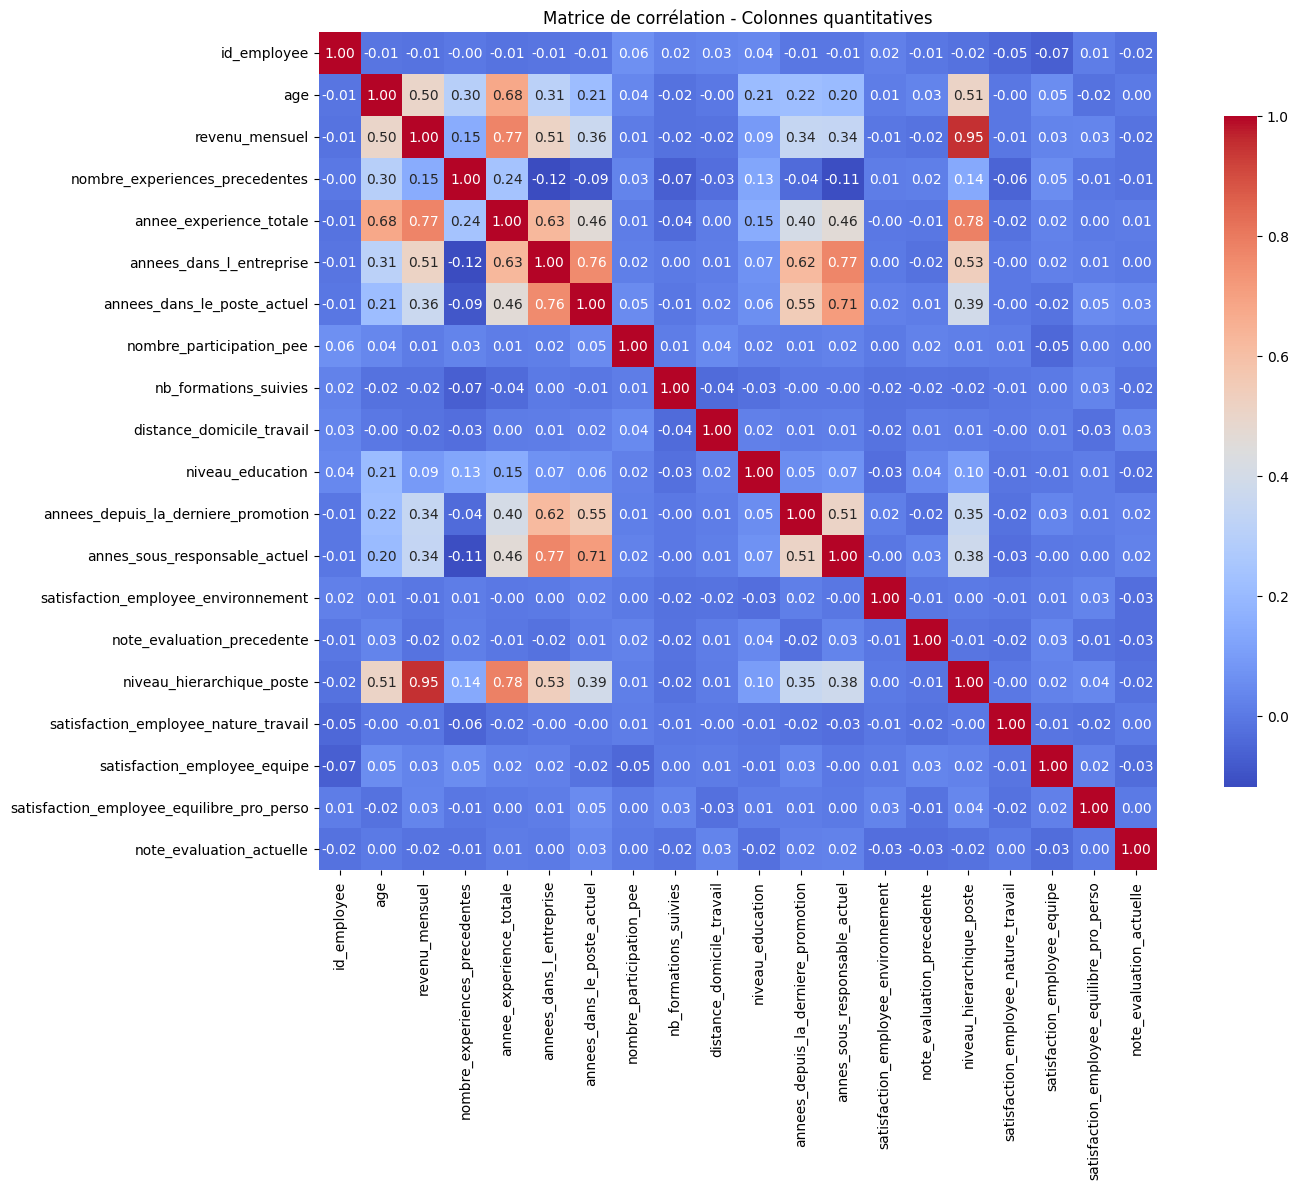

In [1906]:
# Calcul de la matrice de corrélation
corrmat = df_joint[colonnes_quantitatives].corr(numeric_only=True)

# Affichage de la heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corrmat, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de corrélation - Colonnes quantitatives')
plt.tight_layout()
plt.show()

In [1907]:
# Corrélations fortes (> 0.5 )
strong_corr = corrmat[(corrmat.abs() > 0.8) & (corrmat.abs() < 1.0)]
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

                           revenu_mensuel  niveau_hierarchique_poste
revenu_mensuel                        NaN                     0.9503
niveau_hierarchique_poste          0.9503                        NaN


## # Supprimer les colonnes qui ont une seule modalité (pas d'information utile pour Cramer's V)

###  corrélation (Cramer's V) sur colonnes qualitatives

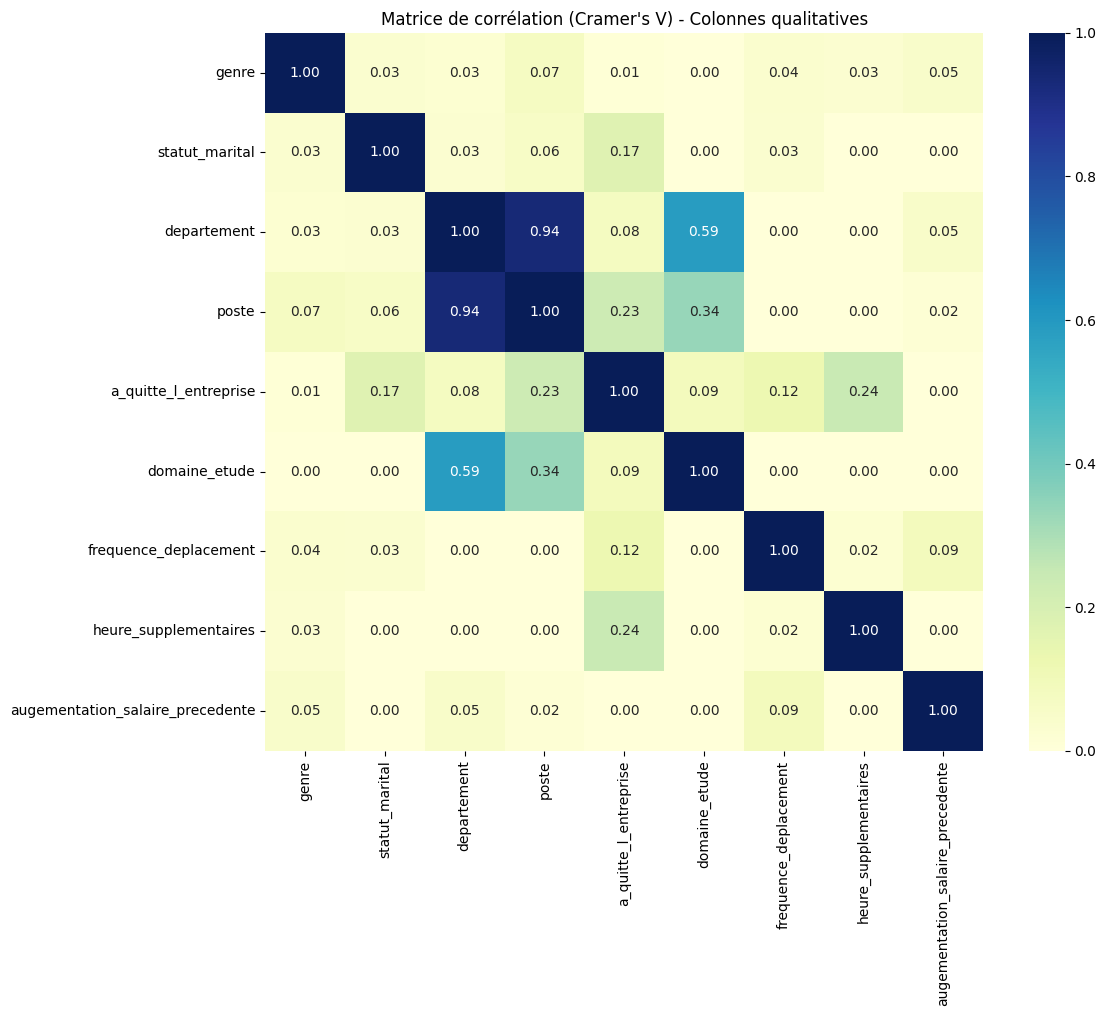

In [1911]:
# Sous-ensemble du DataFrame
df_cat = df_joint[colonnes_qualitatives]

# Fonction pour calculer Cramer's V
def cramers_v(x, y):
    try:
        table = pd.crosstab(x, y)
        if table.shape[0] < 2 or table.shape[1] < 2:
            return np.nan
        chi2, _, _, _ = chi2_contingency(table)
        n = table.sum().sum()
        phi2 = chi2 / n
        r, k = table.shape
        phi2_corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
        r_corr = r - ((r - 1)**2) / (n - 1)
        k_corr = k - ((k - 1)**2) / (n - 1)
        denom = min((k_corr - 1), (r_corr - 1))
        return np.sqrt(phi2_corr / denom) if denom > 0 else np.nan
    except:
        return np.nan

# Création de la matrice vide
mat_cramer = pd.DataFrame(index=colonnes_qualitatives, columns=colonnes_qualitatives)

# Calcul de Cramér's V
for col1 in colonnes_qualitatives:
    for col2 in colonnes_qualitatives:
        if col1 == col2:
            mat_cramer.loc[col1, col2] = 1.0
        else:
            mat_cramer.loc[col1, col2] = cramers_v(df_cat[col1], df_cat[col2])

# Conversion et affichage
mat_cramer = mat_cramer.astype(float)
plt.figure(figsize=(12, 10))
sns.heatmap(mat_cramer, annot=True, fmt=".2f", cmap="YlGnBu", square=True)
plt.title("Matrice de corrélation (Cramer's V) - Colonnes qualitatives")
plt.tight_layout()
plt.show()


In [1912]:
def cramers_v_matrix(df):
    cols = df.columns
    matrix = pd.DataFrame(np.zeros((len(cols), len(cols))), index=cols, columns=cols)

    for col1 in cols:
        for col2 in cols:
            try:
                if col1 == col2:
                    matrix.loc[col1, col2] = 1.0
                else:
                    table = pd.crosstab(df[col1], df[col2])
                    if table.shape[0] < 2 or table.shape[1] < 2:
                        matrix.loc[col1, col2] = np.nan
                        continue
                    chi2, _, _, _ = chi2_contingency(table)
                    n = table.sum().sum()
                    phi2 = chi2 / n
                    r, k = table.shape
                    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
                    rcorr = r - ((r - 1)**2) / (n - 1)
                    kcorr = k - ((k - 1)**2) / (n - 1)
                    denom = min((kcorr - 1), (rcorr - 1))
                    matrix.loc[col1, col2] = np.sqrt(phi2corr / denom) if denom > 0 else np.nan
            except:
                matrix.loc[col1, col2] = np.nan

    return matrix


In [1913]:
colonnes_numeriques = [
    'age', 'revenu_mensuel', 'note_evaluation_actuelle', 'annees_dans_l_entreprise',
    'augementation_salaire_precedente', 'annees_depuis_la_derniere_promotion'
]

df_joint['a_quitte_l_entreprise'] = df_joint['a_quitte_l_entreprise'].str.lower().str.strip()

print("🔍 Analyse statistique (test t de Student) - Variables numériques\n")

for col in colonnes_numeriques:
    try:
        groupe_loyal = pd.to_numeric(df_joint[df_joint['a_quitte_l_entreprise'] == 'non'][col], errors='coerce').dropna()
        groupe_demission = pd.to_numeric(df_joint[df_joint['a_quitte_l_entreprise'] == 'oui'][col], errors='coerce').dropna()

        if len(groupe_loyal) < 2 or len(groupe_demission) < 2:
            print(f"- {col} : ⚠️ Trop peu de données pour effectuer le test (n_loyal={len(groupe_loyal)}, n_démission={len(groupe_demission)})")
            continue

        stat, pval = ttest_ind(groupe_loyal, groupe_demission, equal_var=False)
        interpretation = "🟢 différence significative" if pval < 0.05 else "⚪ pas de différence significative"
        print(f"- {col} → p-value = {pval:.4f} ({interpretation})")

    except Exception as e:
        print(f"❌ Erreur sur {col} : {e}")

🔍 Analyse statistique (test t de Student) - Variables numériques

- age → p-value = 0.0000 (🟢 différence significative)
- revenu_mensuel → p-value = 0.0000 (🟢 différence significative)
- note_evaluation_actuelle → p-value = 0.9125 (⚪ pas de différence significative)
- annees_dans_l_entreprise → p-value = 0.0000 (🟢 différence significative)
- augementation_salaire_precedente : ⚠️ Trop peu de données pour effectuer le test (n_loyal=0, n_démission=0)
- annees_depuis_la_derniere_promotion → p-value = 0.1987 (⚪ pas de différence significative)


In [66]:
# Filtrer uniquement les personnes qui ont quitté l'entreprise
demissionnaires = df_joint[df_joint['a_quitte_l_entreprise'] == 'oui']

# Nettoyage des valeurs dans la colonne 'a_quitte_l_entreprise'
df_joint['a_quitte_l_entreprise'] = df_joint['a_quitte_l_entreprise'].str.lower().str.strip()

# Filtrer les personnes qui ont quitté l'entreprise
df_demission = df_joint[df_joint['a_quitte_l_entreprise'] == 'oui']

# Afficher uniquement les colonnes 'age' et 'a_quitte_l_entreprise'
df_demission[['age', 'a_quitte_l_entreprise', 'genre', 'revenu_mensuel', 'statut_marital', 'poste', 'augementation_salaire_precedente', 'note_evaluation_actuelle', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'departement', 'annees_dans_l_entreprise']]

,age,a_quitte_l_entreprise,genre,revenu_mensuel,statut_marital,poste,augementation_salaire_precedente,note_evaluation_actuelle,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,departement,annees_dans_l_entreprise
0,41,oui,F,5993,Célibataire,Cadre Commercial,11 %,3,Infra & Cloud,Occasionnel,0,Commercial,6
2,37,oui,M,2090,Célibataire,Consultant,15 %,3,Autre,Occasionnel,0,Consulting,0
14,28,oui,M,2028,Célibataire,Consultant,14 %,3,Infra & Cloud,Occasionnel,0,Consulting,4
21,36,oui,M,3407,Célibataire,Représentant Commercial,23 %,4,Infra & Cloud,Occasionnel,0,Commercial,5
24,34,oui,M,2960,Célibataire,Assistant de Direction,11 %,3,Transformation Digitale,Occasionnel,1,Consulting,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,oui,M,1790,Marié(e),Représentant Commercial,19 %,3,Marketing,Frequent,1,Commercial,1
1442,29,oui,M,4787,Marié(e),Assistant de Direction,14 %,3,Transformation Digitale,Occasionnel,2,Consulting,2
1444,56,oui,M,2339,Marié(e),Consultant,11 %,3,Entrepreunariat,Occasionnel,9,Consulting,10
1452,50,oui,M,6728,Divorcé(e),Cadre Commercial,12 %,3,Infra & Cloud,Frequent,0,Commercial,6


In [68]:
# Filtrer uniquement les personnes qui ont quitté l'entreprise
employes = df_joint[df_joint['a_quitte_l_entreprise'] == 'non']

# Nettoyage des valeurs dans la colonne 'a_quitte_l_entreprise'
df_joint['a_quitte_l_entreprise'] = df_joint['a_quitte_l_entreprise'].str.lower().str.strip()

# Filtrer les personnes qui n`ont pas quitté l'entreprise
df_loyal = df_joint[df_joint['a_quitte_l_entreprise'] == 'non']

# Afficher uniquement les colonnes 'age' et 'a_quitte_l_entreprise'
df_loyal[['age', 'a_quitte_l_entreprise', 'genre', 'revenu_mensuel', 'statut_marital', 'poste', 'augementation_salaire_precedente', 'note_evaluation_actuelle', 'domaine_etude', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'departement', 'annees_dans_l_entreprise']]

,age,a_quitte_l_entreprise,genre,revenu_mensuel,statut_marital,poste,augementation_salaire_precedente,note_evaluation_actuelle,domaine_etude,frequence_deplacement,annees_depuis_la_derniere_promotion,departement,annees_dans_l_entreprise
1,49,non,M,5130,Marié(e),Assistant de Direction,23 %,4,Infra & Cloud,Frequent,1,Consulting,10
3,33,non,F,2909,Marié(e),Assistant de Direction,11 %,3,Infra & Cloud,Frequent,3,Consulting,8
4,27,non,M,3468,Marié(e),Consultant,12 %,3,Transformation Digitale,Occasionnel,2,Consulting,2
5,32,non,M,3068,Célibataire,Consultant,13 %,3,Infra & Cloud,Frequent,3,Consulting,7
6,59,non,F,2670,Marié(e),Consultant,20 %,4,Transformation Digitale,Occasionnel,0,Consulting,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,non,M,2571,Marié(e),Consultant,17 %,3,Transformation Digitale,Frequent,0,Consulting,5
1466,39,non,M,9991,Marié(e),Manager,15 %,3,Transformation Digitale,Occasionnel,1,Consulting,7
1467,27,non,M,6142,Marié(e),Tech Lead,20 %,4,Infra & Cloud,Occasionnel,0,Consulting,6
1468,49,non,M,5390,Marié(e),Cadre Commercial,14 %,3,Transformation Digitale,Frequent,0,Commercial,9


## Quali vs Quali
a_quitte_l_entreprise (oui/non) vs genre (M/F)

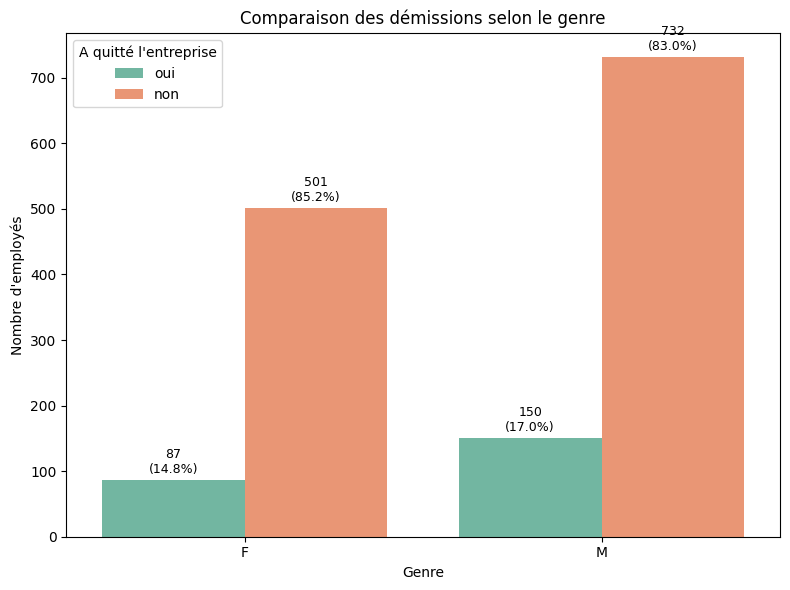

In [1917]:
# Nettoyage
df_joint['a_quitte_l_entreprise'] = df_joint['a_quitte_l_entreprise'].str.lower().str.strip()

# Colonnes utiles
colonnes_utiles = [
    'age', 'a_quitte_l_entreprise', 'genre', 'revenu_mensuel', 'statut_marital',
    'poste', 'augementation_salaire_precedente', 'note_evaluation_actuelle',
    'domaine_etude', 'frequence_deplacement',
    'annees_depuis_la_derniere_promotion', 'departement', 'annees_dans_l_entreprise'
]

# Supprimer les lignes avec valeurs manquantes
df_filtered = df_joint[colonnes_utiles].dropna(subset=['a_quitte_l_entreprise', 'genre'])

# Tracer le graphique
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_filtered, x='genre', hue='a_quitte_l_entreprise', palette='Set2')

# Calculer les pourcentages par groupe (genre)
total_par_genre = df_filtered.groupby('genre').size()

# Annoter avec nombre + pourcentage
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        genre = p.get_x() + p.get_width() / 2
        x_pos = p.get_x() + p.get_width() / 2
        genre_val = p.get_x() + p.get_width() / 2

        # Récupérer la valeur de x (genre)
        x_tick = round(x_pos)
        genre_label = ax.get_xticklabels()[x_tick].get_text()

        # Récupérer le total pour ce genre
        total = total_par_genre.get(genre_label, 1)

        pourcentage = (height / total) * 100

        ax.annotate(
            f'{int(height)}\n({pourcentage:.1f}%)',
            (x_pos, height),
            ha='center',
            va='bottom',
            fontsize=9,
            xytext=(0, 3),
            textcoords='offset points'
        )

# Titres et axes
plt.title("Comparaison des démissions selon le genre")
plt.xlabel("Genre")
plt.ylabel("Nombre d'employés")
plt.legend(title="A quitté l'entreprise")
plt.tight_layout()
plt.show()


## Quanti vs Quali
revenu_mensuel (valeur numérique) vs departement (catégorique)

## Quanti vs Quanti
age vs annees_depuis_la_derniere_promotion

C:\Users\amela\AppData\Local\Temp\ipykernel_10684\622960664.py:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  histplot = sns.histplot(


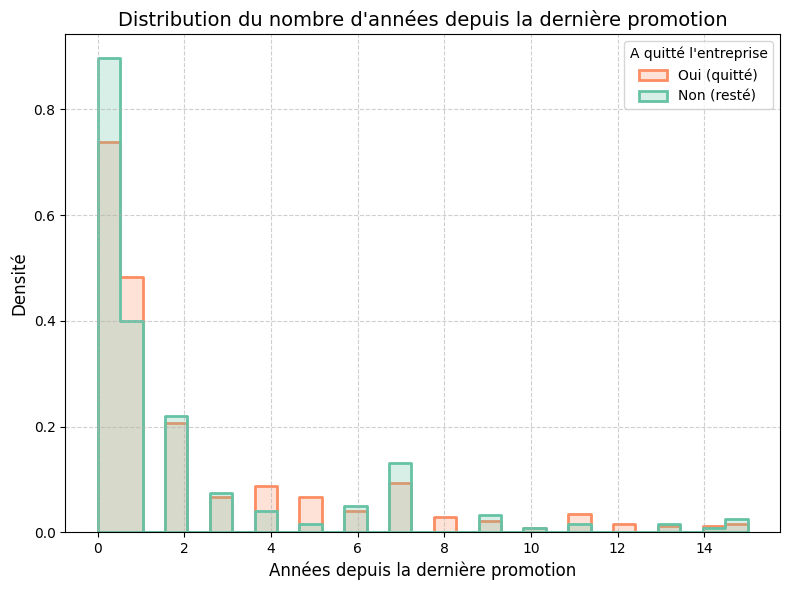

In [1921]:
# Définit la palette avant
pro_palette = sns.color_palette("Set2")

plt.figure(figsize=(8, 6))
histplot = sns.histplot(
    data=df_joint,
    x='annees_depuis_la_derniere_promotion',
    hue='a_quitte_l_entreprise',
    element='step',
    stat='density',
    common_norm=False,
    palette=pro_palette,   # <- ici seulement
    linewidth=2
)

plt.title("Distribution du nombre d'années depuis la dernière promotion", fontsize=14)
plt.xlabel("Années depuis la dernière promotion", fontsize=12)
plt.ylabel("Densité", fontsize=12)
plt.legend(title="A quitté l'entreprise", labels=["Oui (quitté)", "Non (resté)"])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Ajouter les valeurs au-dessus des barres
for patch in histplot.patches:
    height = patch.get_height()
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        y = height
        plt.text(x, y, f"{height:.2f}", ha='center', va='bottom', fontsize=8, rotation=90)

plt.show()



### Analyse statistique 

In [1925]:
# Extraire les groupes
groupe_oui = df_joint[df_joint['a_quitte_l_entreprise'] == 'oui']['revenu_mensuel'].dropna()
groupe_non = df_joint[df_joint['a_quitte_l_entreprise'] == 'non']['revenu_mensuel'].dropna()

# Test ANOVA (pour 2 groupes, c'est équivalent au test t, mais ANOVA peut gérer >2 groupes)
f_stat, p_val = stats.f_oneway(groupe_oui, groupe_non)

print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")


ANOVA F-statistic: 38.489
P-value: 0.000


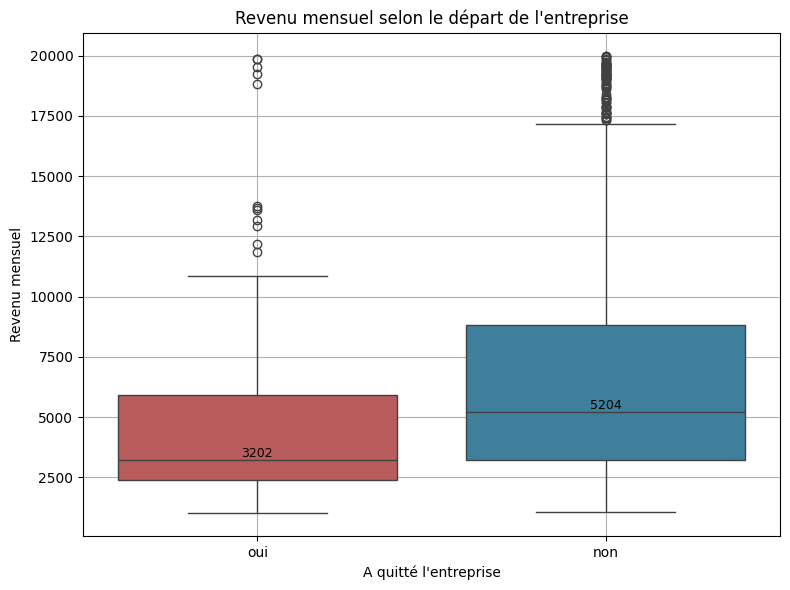

In [1926]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=df_joint,
    x='a_quitte_l_entreprise',
    y='revenu_mensuel',
    hue='a_quitte_l_entreprise',      # nouvelle ligne
    palette={'oui': '#c94c4c', 'non': '#2e86ab'},
    legend=False                      # suppression de légende en double
)

# Ajouter la médiane sur chaque boîte
groupes = df_joint['a_quitte_l_entreprise'].unique()
for i, group in enumerate(groupes):
    mediane = df_joint[df_joint['a_quitte_l_entreprise'] == group]['revenu_mensuel'].median()
    ax.text(i, mediane, f"{mediane:.0f}", ha='center', va='bottom', fontsize=9, color='black')

plt.title("Revenu mensuel selon le départ de l'entreprise")
plt.xlabel("A quitté l'entreprise")
plt.ylabel("Revenu mensuel")
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Variable: genre - p-value = 0.2906
   ❌ Pas de relation significative

📊 Variable: statut_marital - p-value = 0.0000
   🔥 Relation significative avec 'a_quitte_l_entreprise'

📊 Variable: domaine_etude - p-value = 0.0068
   🔥 Relation significative avec 'a_quitte_l_entreprise'

📊 Variable: frequence_deplacement - p-value = 0.0000
   🔥 Relation significative avec 'a_quitte_l_entreprise'

📊 Variable: departement - p-value = 0.0045
   🔥 Relation significative avec 'a_quitte_l_entreprise'

📊 Variable: niveau_education - p-value = 0.5455
   ❌ Pas de relation significative



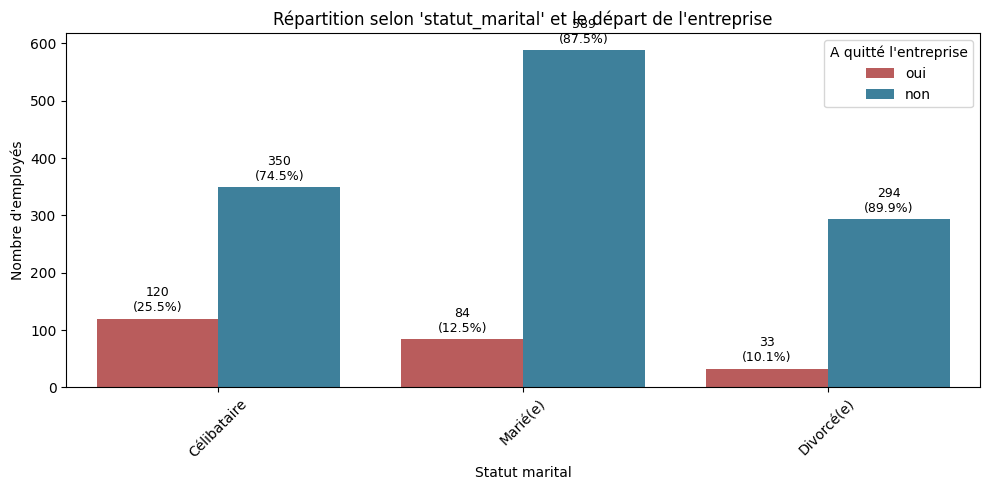

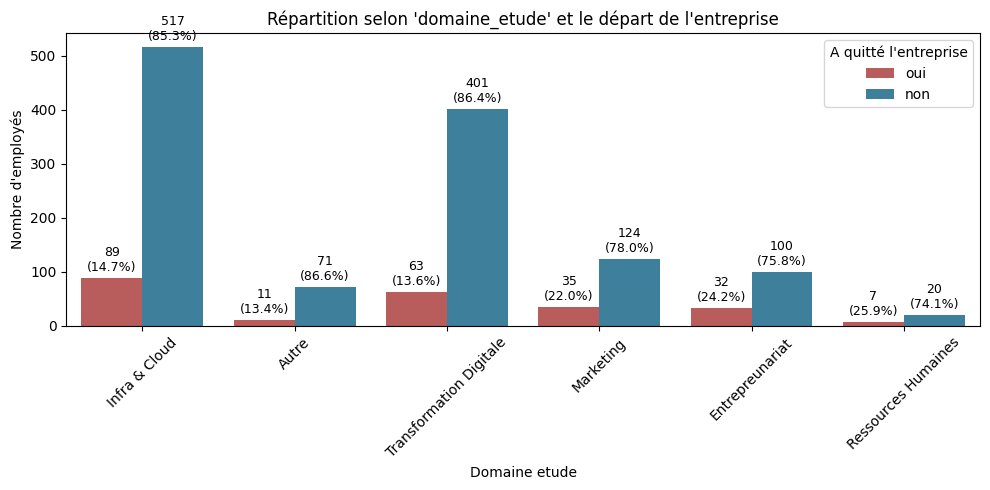

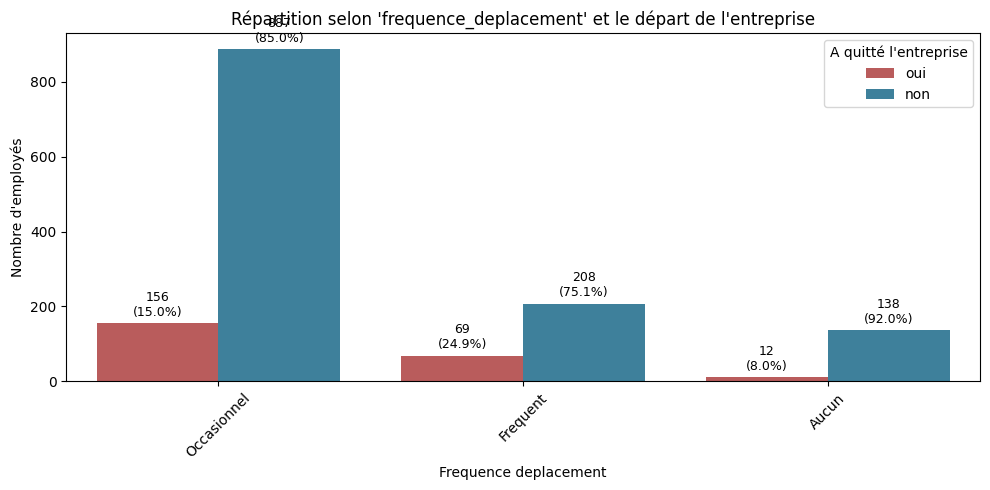

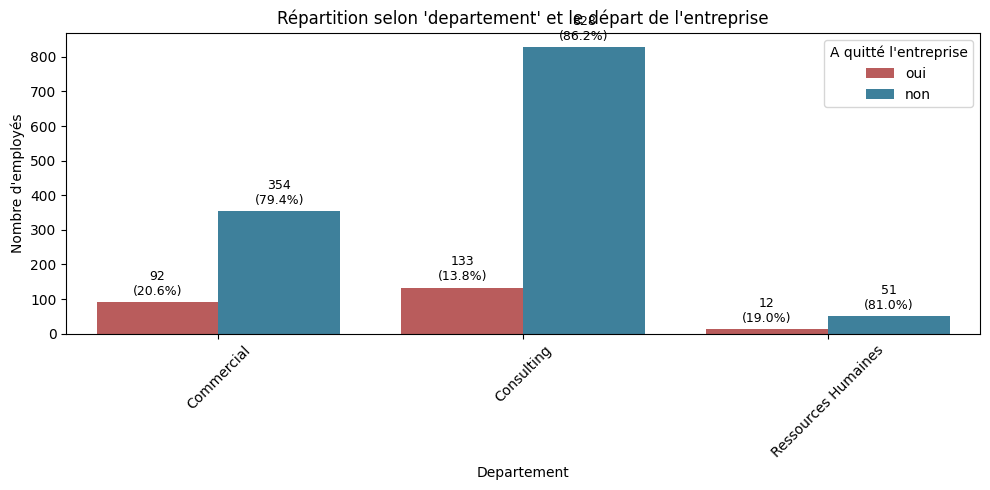

In [1952]:
  # Nettoyage de la variable cible
df_joint['a_quitte_l_entreprise'] = df_joint['a_quitte_l_entreprise'].str.lower().str.strip()

# Palette personnalisée
palette_custom = {'oui': '#c94c4c', 'non': '#2e86ab'}

# Variables catégorielles à tester
variables_cat = [
    'genre', 'statut_marital', 'poste', 'domaine_etude', 'frequence_deplacement', 'departement',
    'niveau_education', 'niveau_hierarchique_poste'
]

# Détection des variables significatives par test du Chi²
variables_significatives = []

for var in variables_cat:
    if var in df_joint.columns:
        table = pd.crosstab(df_joint[var], df_joint['a_quitte_l_entreprise'])
        if table.shape[0] > 1 and table.shape[1] > 1:
            chi2, p, _, _ = chi2_contingency(table)
            print(f"📊 Variable: {var} - p-value = {p:.4f}")
            if p < 0.05:
                print("   🔥 Relation significative avec 'a_quitte_l_entreprise'")
                variables_significatives.append(var)
            else:
                print("   ❌ Pas de relation significative")
            print()

# 🔁 Graphiques pour chaque variable significative
for var in variables_significatives:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(
        data=df_joint
        ,
        x=var,
        hue='a_quitte_l_entreprise',
        palette=palette_custom
    )

    # 👉 Calcul des totaux pour chaque catégorie de var
    total_par_categorie = df_joint.groupby(var).size().to_dict()

    # Ajouter les valeurs exactes et les taux
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            # Obtenir la catégorie (x) et hue (oui/non)
            x_val = p.get_x() + p.get_width() / 2
            x_idx = int(round(x_val))
            categories = [t.get_text() for t in ax.get_xticklabels()]
            if x_idx < len(categories):
                categorie = categories[x_idx]
                total = total_par_categorie.get(categorie, 0)
                taux = (height / total * 100) if total > 0 else 0
                label = f'{int(height)}\n({taux:.1f}%)'
                ax.annotate(label,
                            (p.get_x() + p.get_width() / 2, height),
                            ha='center', va='bottom',
                            fontsize=9, xytext=(0, 3),
                            textcoords='offset points')

    # Titres et axes
    plt.title(f"Répartition selon '{var}' et le départ de l'entreprise")
    plt.xlabel(var.replace('_', ' ').capitalize())
    plt.ylabel("Nombre d'employés")
    plt.legend(title="A quitté l'entreprise", loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [70]:
list_to_remove = ['id_employee', 'poste', 'niveau_hierarchique_poste']
df_joint.drop(list_to_remove, axis=1, inplace=True)

### Séparation des variables catégorielles et numériques

In [73]:
# Séparer les colonnes quantitatives (numériques)
colonnes_quantitatives = df_joint.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Séparer les colonnes qualitatives (catégoriques / objet)
colonnes_qualitatives = df_joint.select_dtypes(include=['object', 'category']).columns.tolist()

### Transformation de variables 

In [76]:
# Nettoyer la variable cible
df_joint['a_quitte_l_entreprise'] = df_joint['a_quitte_l_entreprise'].str.lower().str.strip()
df_joint = df_joint[df_joint['a_quitte_l_entreprise'].isin(['oui', 'non'])]

# Transformer la cible en binaire
df_joint['target'] = df_joint['a_quitte_l_entreprise'].map({'oui': 1, 'non': 0})

In [78]:
df_joint.columns.tolist()

['age',
 'genre',
 'revenu_mensuel',
 'statut_marital',
 'departement',
 'nombre_experiences_precedentes',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'a_quitte_l_entreprise',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'niveau_education',
 'domaine_etude',
 'frequence_deplacement',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'heure_supplementaires',
 'augementation_salaire_precedente',
 'target']

In [80]:
nb_colonnes = len(df_joint.columns)
nb_colonnes

27

In [ ]:
print(df_joint[numerical_cols].dtypes)

In [82]:
print(df_joint['augementation_salaire_precedente'].head(10))
print(df_joint['augementation_salaire_precedente'].map(repr).unique())

0    11 %
1    23 %
2    15 %
3    11 %
4    12 %
5    13 %
6    20 %
7    22 %
8    21 %
9    13 %
Name: augementation_salaire_precedente, dtype: object
["'11 %'" "'23 %'" "'15 %'" "'12 %'" "'13 %'" "'20 %'" "'22 %'" "'21 %'"
 "'17 %'" "'14 %'" "'16 %'" "'18 %'" "'19 %'" "'24 %'" "'25 %'"]


In [84]:
def nettoyer_pourcent(col):
    return (
        col.str.strip()                         # enlever espaces
           .str.replace('%', '', regex=False)  # enlever le %
           .astype(float)                       # convertir en float
    )

df_joint['augementation_salaire_precedente'] = nettoyer_pourcent(df_joint['augementation_salaire_precedente'])

print(df_joint['augementation_salaire_precedente'].head(10))
print(df_joint['augementation_salaire_precedente'].dtype)


0    11.0
1    23.0
2    15.0
3    11.0
4    12.0
5    13.0
6    20.0
7    22.0
8    21.0
9    13.0
Name: augementation_salaire_precedente, dtype: float64
float64


In [86]:
df_joint['augementation_salaire_precedente'] = df_joint['augementation_salaire_precedente'] / 100
print(df_joint['augementation_salaire_precedente'].head(10))

0    0.11
1    0.23
2    0.15
3    0.11
4    0.12
5    0.13
6    0.20
7    0.22
8    0.21
9    0.13
Name: augementation_salaire_precedente, dtype: float64


In [88]:
# Heure supplémentaires : Oui/Non → 1/0
df_joint['heure_supplementaires'] = df_joint['heure_supplementaires'].map({'Non': 0, 'Oui': 1})

In [90]:
df_joint.columns.tolist()

['age',
 'genre',
 'revenu_mensuel',
 'statut_marital',
 'departement',
 'nombre_experiences_precedentes',
 'annee_experience_totale',
 'annees_dans_l_entreprise',
 'annees_dans_le_poste_actuel',
 'a_quitte_l_entreprise',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'niveau_education',
 'domaine_etude',
 'frequence_deplacement',
 'annees_depuis_la_derniere_promotion',
 'annes_sous_responsable_actuel',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'heure_supplementaires',
 'augementation_salaire_precedente',
 'target']

In [92]:
print(df_joint['heure_supplementaires'].unique())


[1 0]


In [94]:
print(df_joint[['heure_supplementaires', 'augementation_salaire_precedente']].dtypes)


heure_supplementaires                 int64
augementation_salaire_precedente    float64
dtype: object


In [96]:
df_joint.drop(columns=['a_quitte_l_entreprise'], inplace=True)

## Modelisation

In [99]:
target = 'target'   # probabilité de démission de chaque employé
features = ['age',
 'genre',
 'revenu_mensuel',
 'statut_marital',
 'departement',
 'nombre_experiences_precedentes',
 'annees_dans_l_entreprise',
 'nombre_participation_pee',
 'nb_formations_suivies',
 'distance_domicile_travail',
 'niveau_education',
 'domaine_etude',
 'frequence_deplacement',
 'annees_depuis_la_derniere_promotion',
 'satisfaction_employee_environnement',
 'note_evaluation_precedente',
 'satisfaction_employee_nature_travail',
 'satisfaction_employee_equipe',
 'satisfaction_employee_equilibre_pro_perso',
 'note_evaluation_actuelle',
 'augementation_salaire_precedente',]

In [101]:

X = df_joint[features]       # Features définies 
y = df_joint['target']       # Cible : 0 = rester, 1 = démissionner

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=45,
    stratify=y  # ➜ On garde la proportion de 0 et 1 dans train et test
)


### DummyClassifier 

In [1840]:
dummy_classifier = DummyClassifier(strategy='stratified', random_state=45)
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)

# 4. Évaluation

# 🧮 Matrice de confusion 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("DummyClassifier (stratégie = stratified)")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score  : {f1_score(y_test, y_pred):.4f}")
print(f"Précision : {precision_score(y_test, y_pred):.4f}")
print(f"Rappel    : {recall_score(y_test, y_pred):.4f}")

Confusion Matrix:
[[201  46]
 [ 39   8]]
DummyClassifier (stratégie = stratified)
Accuracy  : 0.7109
F1-score  : 0.1584
Précision : 0.1481
Rappel    : 0.1702


## Regresion Logistique + RandomizedSearchCV

In [180]:
# Séparer les colonnes quantitatives (numériques)
colonnes_quantitatives = df_joint.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Séparer les colonnes qualitatives (catégoriques / objet)
colonnes_qualitatives = df_joint.select_dtypes(include=['object', 'category']).columns.tolist()

In [182]:
numerical_cols = [
    'age', 'revenu_mensuel', 'nombre_experiences_precedentes', 'annees_dans_l_entreprise',
    'nombre_participation_pee', 'nb_formations_suivies', 'distance_domicile_travail',
    'niveau_education', 'annees_depuis_la_derniere_promotion',
    'satisfaction_employee_environnement', 'note_evaluation_precedente',
    'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe',
    'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle', 'augementation_salaire_precedente'
]

categorical_cols = [
    'genre', 'statut_marital', 'departement', 'domaine_etude', 'frequence_deplacement'
]

Fitting 3 folds for each of 30 candidates, totalling 90 fits
📌 Meilleur seuil F1 valide : 0.59 — F1-score : 0.3902
✅ Accuracy: 0.7448979591836735
🎯 F1-score : 0.3902439024390244
🎯 Précision : 0.3157894736842105
🎯 Rappel : 0.5106382978723404
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.79      0.84       247
           1       0.32      0.51      0.39        47

    accuracy                           0.74       294
   macro avg       0.61      0.65      0.61       294
weighted avg       0.80      0.74      0.77       294

🧩 Matrice de confusion:
 [[195  52]
 [ 23  24]]
🏅 Meilleurs paramètres : {'classifier__C': np.float64(0.19395198585753026), 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


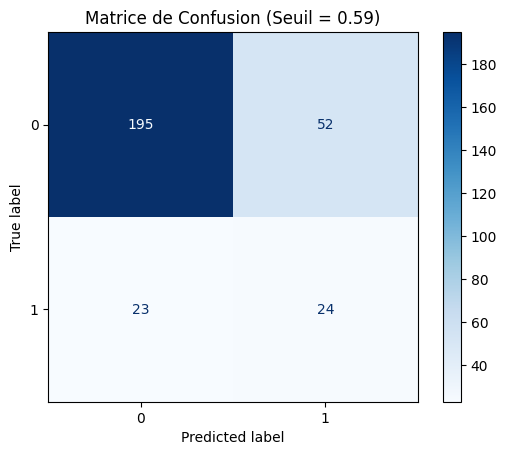

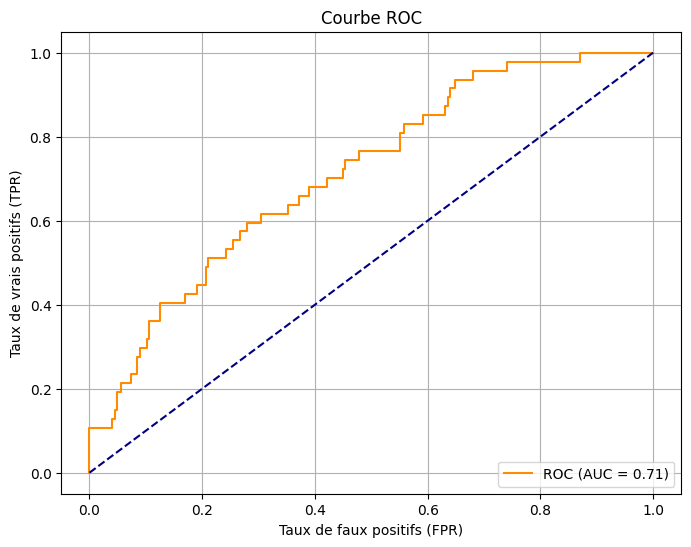

In [1848]:
# 3. Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# 4. Pipeline de modèle
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=45))
])

# 5. Randomized Search CV
param_dist = {
    'classifier__C': uniform(0.01), # plus C est petit, plus la regularisation est fort (evite surapprentissage)
    'classifier__penalty': ['l1', 'l2'], # type de penalite utiliser pour la regularisation 
    'classifier__class_weight': [None, 'balanced'], # permets a gerer des classes desequilibre 
    'classifier__solver': ['liblinear']  # nécessaire pour l1 + l2, adapte aux petites jeux de donnes et a la classification binaire
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=45,
    n_jobs=-1
)

# 6. Entraînement
search.fit(X_train, y_train)
best_model = search.best_estimator_

# 7. Prédictions probabilistes
y_proba = best_model.predict_proba(X_test)[:, 1]

# 8. Optimisation du seuil pour F1
thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores = []
valid_thresholds = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    if len(np.unique(y_pred_thresh)) < 2:
        continue  # Ignore les seuils qui donnent qu'une seule classe
    score = f1_score(y_test, y_pred_thresh, zero_division=0)
    f1_scores.append(score)
    valid_thresholds.append(t)

# Meilleur seuil
best_f1_idx = np.argmax(f1_scores)
best_f1_thresh = valid_thresholds[best_f1_idx]
print(f"📌 Meilleur seuil F1 valide : {best_f1_thresh:.2f} — F1-score : {f1_scores[best_f1_idx]:.4f}")

# 9. Évaluation avec seuil optimal
y_pred_opt = (y_proba >= best_f1_thresh).astype(int)

print("✅ Accuracy:", accuracy_score(y_test, y_pred_opt))
print("🎯 F1-score :", f1_score(y_test, y_pred_opt, zero_division=0))
print("🎯 Précision :", precision_score(y_test, y_pred_opt, zero_division=0))
print("🎯 Rappel :", recall_score(y_test, y_pred_opt, zero_division=0))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_opt, zero_division=0))
print("🧩 Matrice de confusion:\n", confusion_matrix(y_test, y_pred_opt))
print("🏅 Meilleurs paramètres :", search.best_params_)

# 10. Matrice de confusion affichée
cm = confusion_matrix(y_test, y_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matrice de Confusion (Seuil = {best_f1_thresh:.2f})")
plt.show()

# 11. Courbe ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

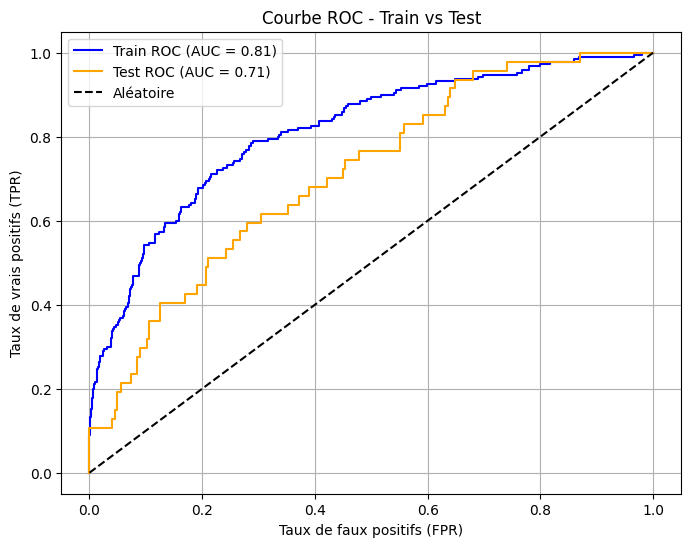

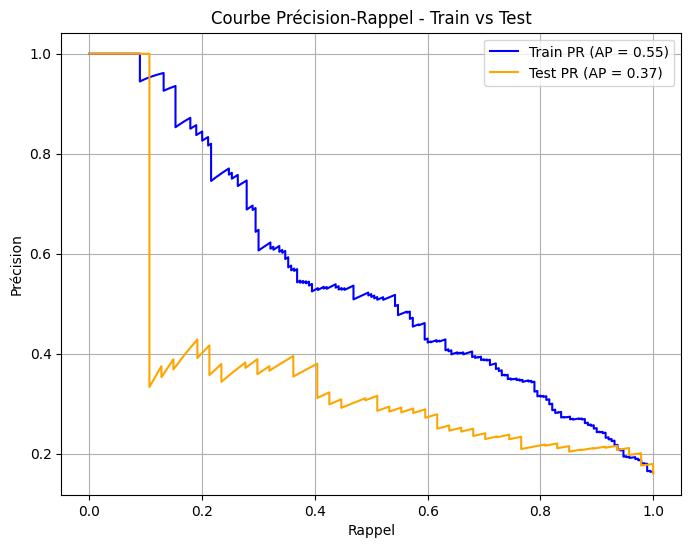

In [1850]:
# 1. Prédictions probabilistes
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# === ROC CURVE ===
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

auc_train = roc_auc_score(y_train, y_train_proba)
auc_test = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {auc_train:.2f})", color='blue')
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {auc_test:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--', label="Aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC - Train vs Test")
plt.legend()
plt.grid(True)
plt.show()

# === PR CURVE ===
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

ap_train = average_precision_score(y_train, y_train_proba)
ap_test = average_precision_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall_train, precision_train, label=f"Train PR (AP = {ap_train:.2f})", color='blue')
plt.plot(recall_test, precision_test, label=f"Test PR (AP = {ap_test:.2f})", color='orange')
plt.xlabel("Rappel")
plt.ylabel("Précision")
plt.title("Courbe Précision-Rappel - Train vs Test")
plt.legend()
plt.grid(True)
plt.show()


### XGBoost + RandomizedSearchCV

In [103]:
# Séparer les features
X = df_joint[features]
y = df_joint["target"]

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ]
)

# Split stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=45
)

# Appliquer les transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Créer les DMatrix
dtrain = xgb.DMatrix(X_train_processed, label=y_train)
dtest = xgb.DMatrix(X_test_processed, label=y_test)

# Paramètres du modèle
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "learning_rate": 0.05,
    "max_depth": 2,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "reg_alpha": 1,       # régularisation L1
    "reg_lambda": 1,      # régularisation L2
    "seed": 45
}
# Entraînement avec early stopping
evallist = [(dtest, "eval"), (dtrain, "train")]

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=evallist,
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	eval-logloss:0.43726	train-logloss:0.43797
[10]	eval-logloss:0.41967	train-logloss:0.40728
[20]	eval-logloss:0.41084	train-logloss:0.38829
[30]	eval-logloss:0.40645	train-logloss:0.37360
[40]	eval-logloss:0.40237	train-logloss:0.36174
[50]	eval-logloss:0.40073	train-logloss:0.35252
[60]	eval-logloss:0.39712	train-logloss:0.34396
[70]	eval-logloss:0.39614	train-logloss:0.33669
[80]	eval-logloss:0.39613	train-logloss:0.33002
[90]	eval-logloss:0.39372	train-logloss:0.32383
[100]	eval-logloss:0.39013	train-logloss:0.31843
[110]	eval-logloss:0.39007	train-logloss:0.31320
[120]	eval-logloss:0.38922	train-logloss:0.30868
[130]	eval-logloss:0.38925	train-logloss:0.30365
[140]	eval-logloss:0.38817	train-logloss:0.29975
[150]	eval-logloss:0.38765	train-logloss:0.29636
[160]	eval-logloss:0.38654	train-logloss:0.29269
[170]	eval-logloss:0.38626	train-logloss:0.28935
[180]	eval-logloss:0.38631	train-logloss:0.28641
[190]	eval-logloss:0.38506	train-logloss:0.28320
[200]	eval-logloss:0.38445	trai

In [105]:
print("Nombre optimal d'arbres:", model.best_iteration)

Nombre optimal d'arbres: 499


[0]	eval-logloss:0.43726	train-logloss:0.43797
[10]	eval-logloss:0.41967	train-logloss:0.40728
[20]	eval-logloss:0.41084	train-logloss:0.38829
[30]	eval-logloss:0.40645	train-logloss:0.37360
[40]	eval-logloss:0.40237	train-logloss:0.36174
[50]	eval-logloss:0.40073	train-logloss:0.35252
[60]	eval-logloss:0.39712	train-logloss:0.34396
[70]	eval-logloss:0.39614	train-logloss:0.33669
[80]	eval-logloss:0.39613	train-logloss:0.33002
[90]	eval-logloss:0.39372	train-logloss:0.32383
[100]	eval-logloss:0.39013	train-logloss:0.31843
[110]	eval-logloss:0.39007	train-logloss:0.31320
[120]	eval-logloss:0.38922	train-logloss:0.30868
[130]	eval-logloss:0.38925	train-logloss:0.30365
[140]	eval-logloss:0.38817	train-logloss:0.29975
[150]	eval-logloss:0.38765	train-logloss:0.29636
[160]	eval-logloss:0.38654	train-logloss:0.29269
[170]	eval-logloss:0.38626	train-logloss:0.28935
[180]	eval-logloss:0.38631	train-logloss:0.28641
[190]	eval-logloss:0.38506	train-logloss:0.28320
[200]	eval-logloss:0.38445	trai

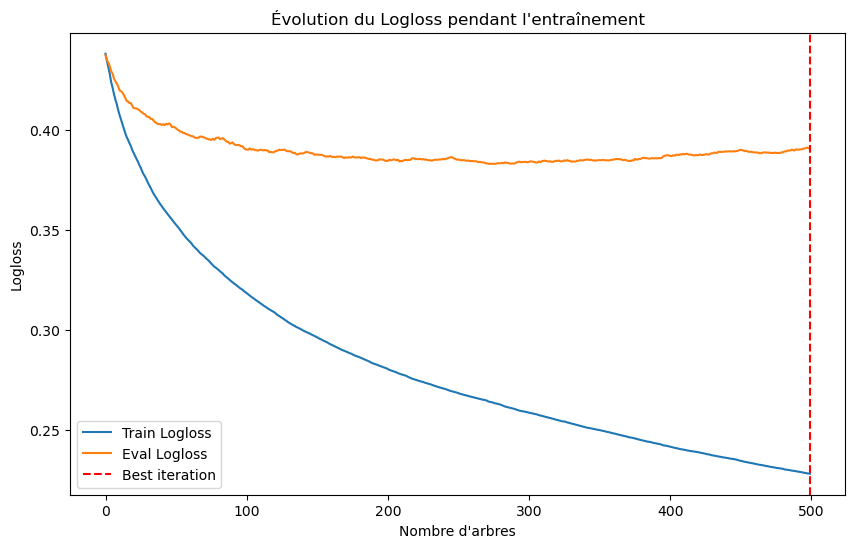

In [107]:
evals_result = {}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=evallist,
    early_stopping_rounds=20,
    evals_result=evals_result,  # <=== indispensable
    verbose_eval=10
)
train_logloss = evals_result['train']['logloss']
eval_logloss = evals_result['eval']['logloss']

plt.figure(figsize=(10,6))
plt.plot(train_logloss, label='Train Logloss')
plt.plot(eval_logloss, label='Eval Logloss')
plt.axvline(x=model.best_iteration, color='r', linestyle='--', label='Best iteration')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Logloss')
plt.title('Évolution du Logloss pendant l\'entraînement')
plt.legend()
plt.show()

In [109]:
print("Nombre optimal d'arbres :", model.best_iteration)

Nombre optimal d'arbres : 499


In [111]:
y_pred_proba = model.predict(xgb.DMatrix(X_test_processed))
y_pred = (y_pred_proba >= 0.5).astype(int)

In [113]:
counter = Counter(y_train)

# On récupère directement le nombre d'exemples par classe
n_majority = max(counter.values())
n_minority = min(counter.values())

# Calcul du ratio
ratio = n_majority / n_minority 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\amela\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:51:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 0.7483
🎯 F1-score : 0.4308
🎯 Précision : 0.3373
🎯 Rappel : 0.5957
🧠 ROC AUC Score : 0.7353
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.34      0.60      0.43        47

    accuracy                           0.75       294
   macro avg       0.62      0.69      0.63       294
weighted avg       0.82      0.75      0.77       294

🧩 Matrice de confusion:


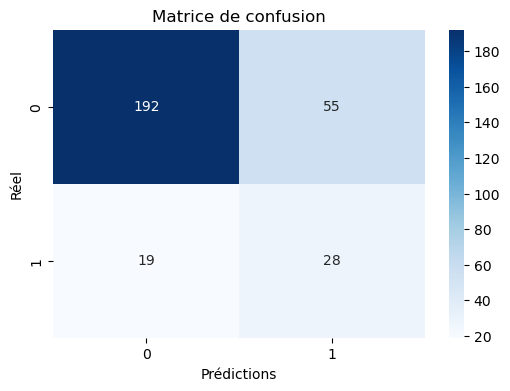

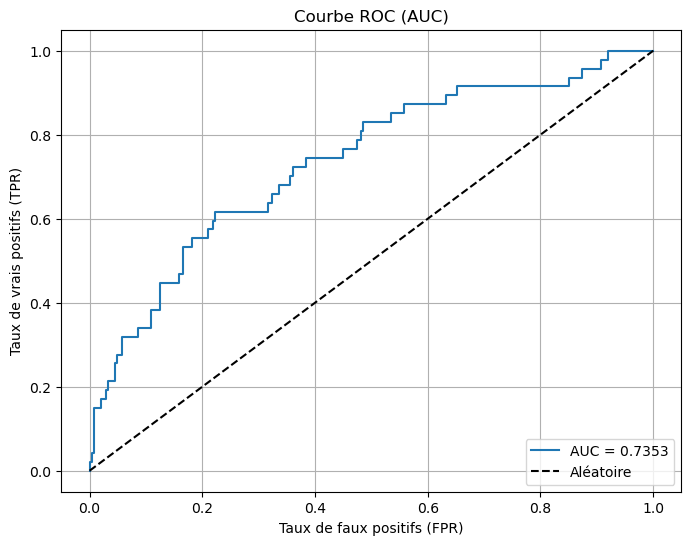

In [115]:
# Préparation
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

ratio = n_majority / n_minority 

pipeline = Pipeline([
    ("preprocessing", preprocessor),
    ("xgb", XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=45,
        scale_pos_weight=ratio  
    ))
])

# Grille d'hyperparamètres
param_distributions = {
    "xgb__n_estimators": [100, 200],
    "xgb__max_depth": [1, 2, 3],
    "xgb__learning_rate": [0.01, 0.05],
    "xgb__subsample": [0.6, 0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8, 1.0],
    "xgb__reg_alpha": [1, 2, 5],
    "xgb__reg_lambda": [1, 2, 5],
}

# RandomizedSearchCV avec scoring F1
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,
    scoring="f1",
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=45),
    verbose=2,
    n_jobs=-1,
    random_state=45
)

# Entraînement
random_search.fit(X_train, y_train)

# Meilleur modèle
best_model = random_search.best_estimator_

# Prédictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Évaluation
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("🎯 F1-score :", round(f1_score(y_test, y_pred), 4))
print("🎯 Précision :", round(precision_score(y_test, y_pred), 4))
print("🎯 Rappel :", round(recall_score(y_test, y_pred), 4))
print("🧠 ROC AUC Score :", round(roc_auc_score(y_test, y_pred_proba), 4))
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧩 Matrice de confusion:")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.4f}")
plt.plot([0, 1], [0, 1], 'k--', label="Aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC (AUC)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


📘 Évaluation sur le jeu d'entraînement
✅ Accuracy: 0.8342
🎯 F1-score : 0.6184
🎯 Précision : 0.4922
🎯 Rappel : 0.8316
🧠 ROC AUC Score : 0.9104
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       986
           1       0.49      0.83      0.62       190

    accuracy                           0.83      1176
   macro avg       0.73      0.83      0.76      1176
weighted avg       0.89      0.83      0.85      1176

🧩 Matrice de confusion:


C:\Users\amela\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


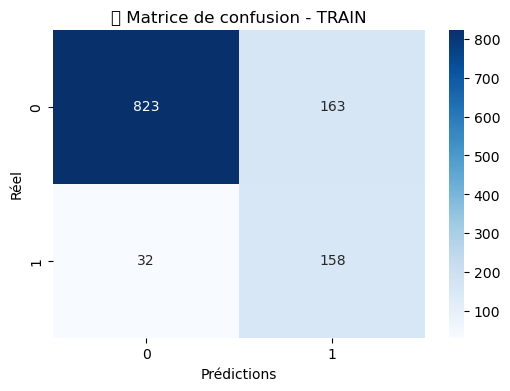

C:\Users\amela\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)



📕 Évaluation sur le jeu de test
✅ Accuracy: 0.7483
🎯 F1-score : 0.4308
🎯 Précision : 0.3373
🎯 Rappel : 0.5957
🧠 ROC AUC Score : 0.7353
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.34      0.60      0.43        47

    accuracy                           0.75       294
   macro avg       0.62      0.69      0.63       294
weighted avg       0.82      0.75      0.77       294

🧩 Matrice de confusion:


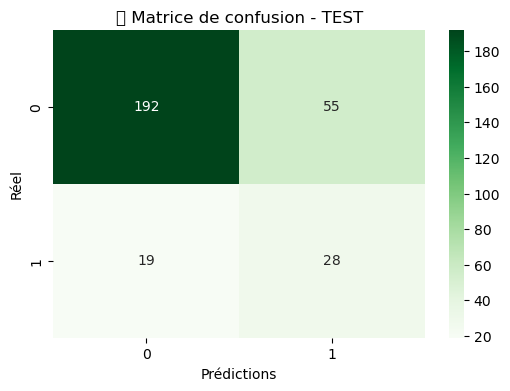

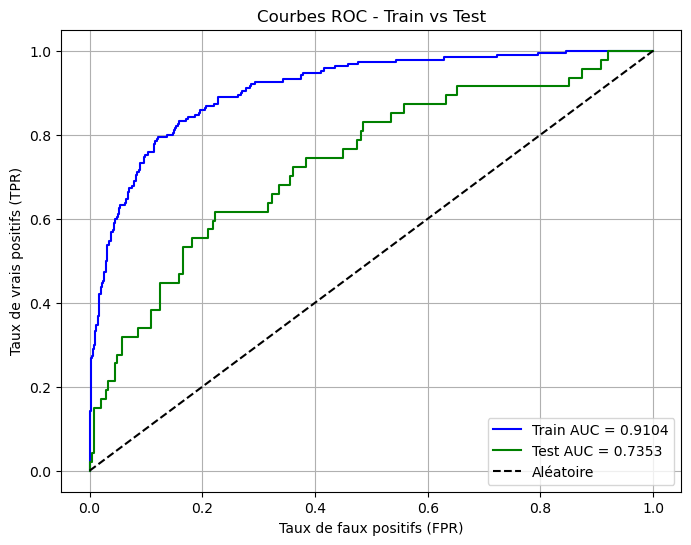

In [117]:
# --- Prédictions pour train ---
y_train_pred = best_model.predict(X_train)
y_train_proba = best_model.predict_proba(X_train)[:, 1]

# --- Prédictions pour test ---
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# --- Évaluation sur TRAIN ---
print("📘 Évaluation sur le jeu d'entraînement")
print("✅ Accuracy:", round(accuracy_score(y_train, y_train_pred), 4))
print("🎯 F1-score :", round(f1_score(y_train, y_train_pred), 4))
print("🎯 Précision :", round(precision_score(y_train, y_train_pred), 4))
print("🎯 Rappel :", round(recall_score(y_train, y_train_pred), 4))
print("🧠 ROC AUC Score :", round(roc_auc_score(y_train, y_train_proba), 4))
print("📊 Classification Report:\n", classification_report(y_train, y_train_pred))
print("🧩 Matrice de confusion:")
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title("🧩 Matrice de confusion - TRAIN")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# --- Évaluation sur TEST ---
print("\n📕 Évaluation sur le jeu de test")
print("✅ Accuracy:", round(accuracy_score(y_test, y_test_pred), 4))
print("🎯 F1-score :", round(f1_score(y_test, y_test_pred), 4))
print("🎯 Précision :", round(precision_score(y_test, y_test_pred), 4))
print("🎯 Rappel :", round(recall_score(y_test, y_test_pred), 4))
print("🧠 ROC AUC Score :", round(roc_auc_score(y_test, y_test_proba), 4))
print("📊 Classification Report:\n", classification_report(y_test, y_test_pred))
print("🧩 Matrice de confusion:")
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greens')
plt.title("🧩 Matrice de confusion - TEST")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()

# --- ROC Curves (TRAIN vs TEST) ---
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train AUC = {roc_auc_score(y_train, y_train_proba):.4f}", color='blue')
plt.plot(fpr_test, tpr_test, label=f"Test AUC = {roc_auc_score(y_test, y_test_proba):.4f}", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbes ROC - Train vs Test")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [119]:
print(X_train.columns)

Index(['age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement',
       'nombre_experiences_precedentes', 'annees_dans_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'frequence_deplacement', 'annees_depuis_la_derniere_promotion',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'augementation_salaire_precedente'],
      dtype='object')


🔍 Meilleur seuil: 0.49 avec F1-score = 0.4394


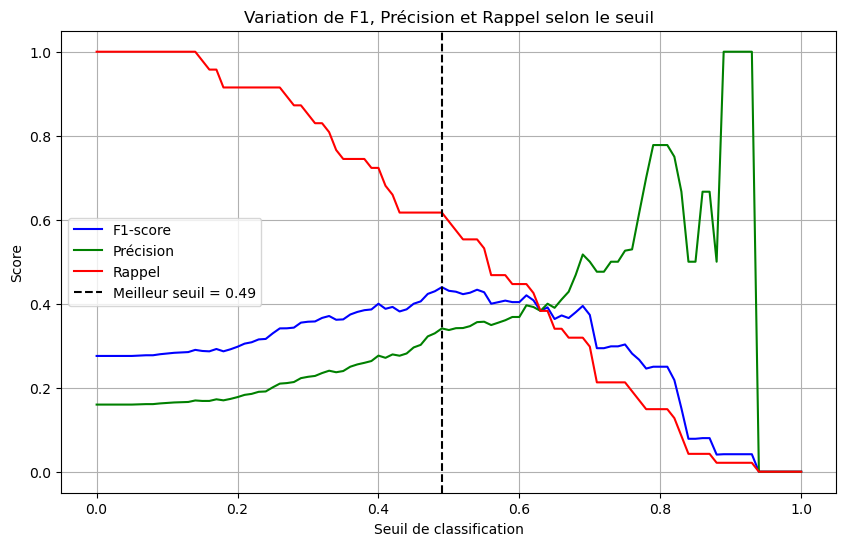

In [200]:
# Probabilités prédites pour la classe positive
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Seuils à tester (de 0.0 à 1.0 par pas de 0.01)
thresholds = np.arange(0.0, 1.01, 0.01)

f1_scores = []
precisions = []
recalls = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh, zero_division=0))
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))


# Trouver le seuil qui maximise le F1-score
best_thresh = 0.49
best_f1 = max(f1_scores)

print(f"🔍 Meilleur seuil: {best_thresh:.2f} avec F1-score = {best_f1:.4f}")

# Tracer les courbes
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1-score', color='blue')
plt.plot(thresholds, precisions, label='Précision', color='green')
plt.plot(thresholds, recalls, label='Rappel', color='red')
plt.axvline(x=best_thresh, color='black', linestyle='--', label=f'Meilleur seuil = {best_thresh:.2f}')
plt.xlabel("Seuil de classification")
plt.ylabel("Score")
plt.title("Variation de F1, Précision et Rappel selon le seuil")
plt.legend()
plt.grid(True)
plt.show()

In [202]:
counter = Counter(y_train)
n_neg = counter[0]
n_pos = counter[1]

scale_pos_weight = n_neg / n_pos
print(f"✅ scale_pos_weight = {scale_pos_weight:.2f}")

✅ scale_pos_weight = 5.19


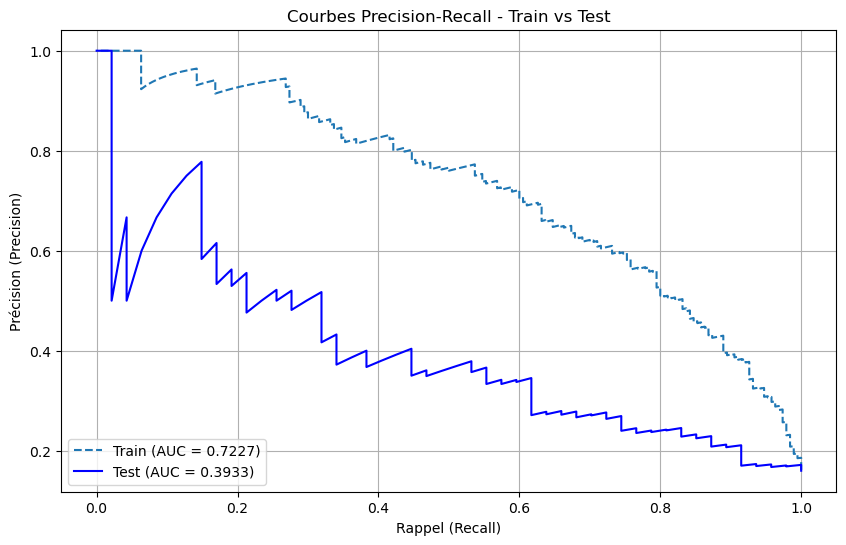

In [204]:
# === Prédictions probabilistes ===
y_train_proba = best_model.predict_proba(X_train)[:, 1]
y_test_proba = best_model.predict_proba(X_test)[:, 1]

# === Courbes precision-recall ===
precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

# === AUC PR (facultatif mais utile) ===
pr_auc_train = auc(recall_train, precision_train)
pr_auc_test = auc(recall_test, precision_test)

# === Plot ===
plt.figure(figsize=(10, 6))
plt.plot(recall_train, precision_train, label=f"Train (AUC = {pr_auc_train:.4f})", linestyle='--')
plt.plot(recall_test, precision_test, label=f"Test (AUC = {pr_auc_test:.4f})", color='blue')
plt.xlabel("Rappel (Recall)")
plt.ylabel("Précision (Precision)")
plt.title("Courbes Precision-Recall - Train vs Test")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [206]:
# Calcul du poids pour la classe positive
counter = Counter(y_train)
scale_pos_weight = counter[0] / counter[1]  # classe négative / classe positive

In [208]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Assurer que les colonnes sont les mêmes dans train et test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [210]:
model = best_model.named_steps["xgb"]

# Extraire les données transformées (X_train prétraité)
X_train_encoded = best_model.named_steps["preprocessing"].transform(X_train)

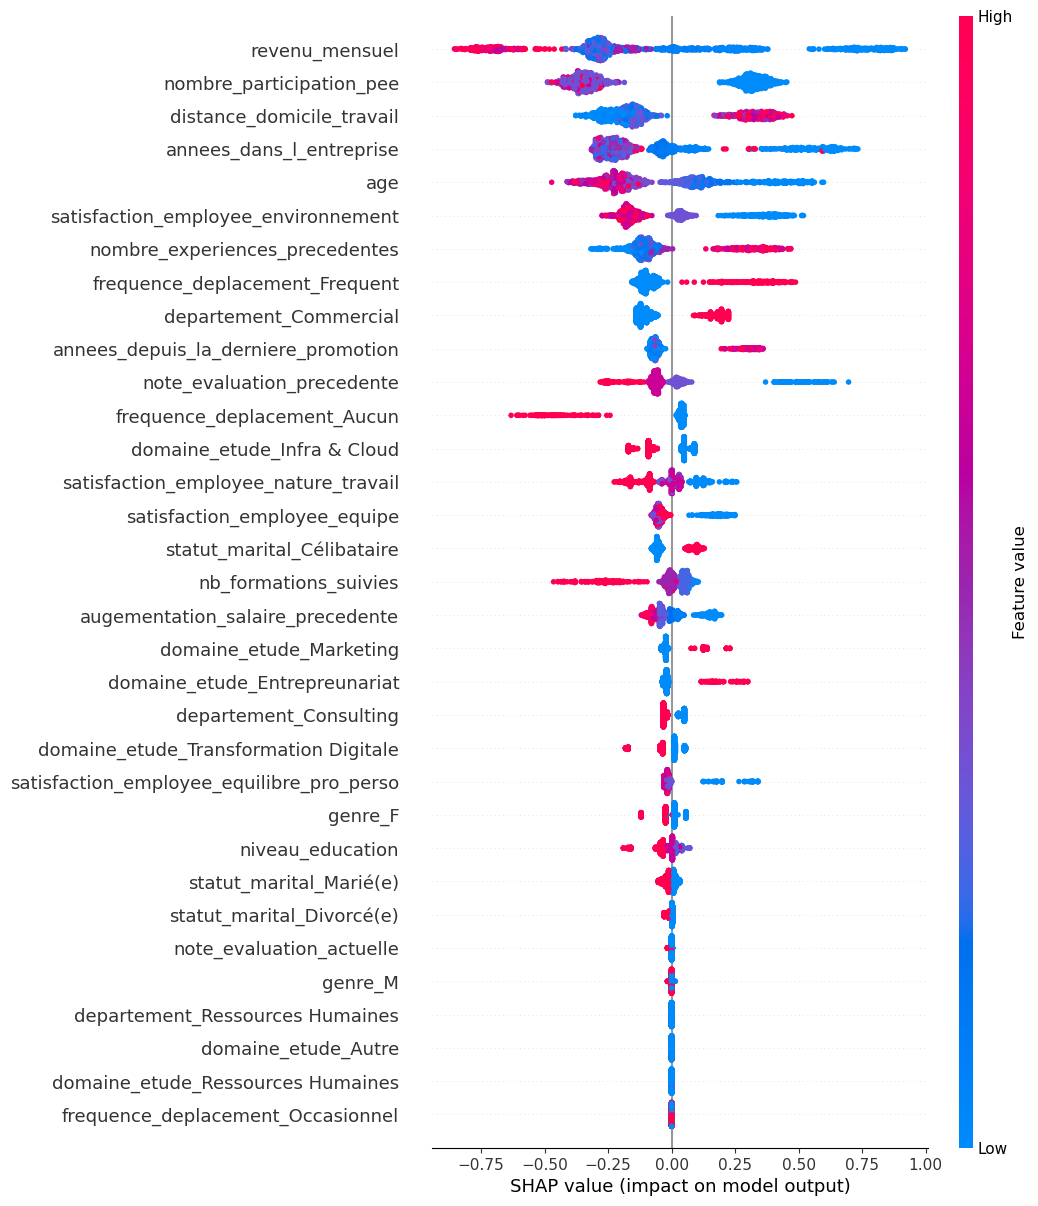

In [212]:
# 🔹 Séparer automatiquement les colonnes numériques et catégorielles
colonnes_quantitatives = df_joint.select_dtypes(include=['int64', 'float64']).columns.tolist()
colonnes_qualitatives = df_joint.select_dtypes(include=['object', 'category']).columns.tolist()

# (Optionnel) Si 'target' ou toute autre variable ne doit pas être dans les features :
colonnes_quantitatives = [col for col in colonnes_quantitatives if col != 'target']
colonnes_qualitatives = [col for col in colonnes_qualitatives if col != 'target']

# ✅ Étape 1 : Récupérer les colonnes transformées (après OneHotEncoder et StandardScaler)
preprocessor = best_model.named_steps["preprocessing"]
ohe = preprocessor.named_transformers_["cat"]
num_features = preprocessor.transformers_[0][2]  # colonnes numériques
cat_features = preprocessor.transformers_[1][2]  # colonnes catégorielles

# Récupérer les noms après encodage OneHotEncoder
ohe_feature_names = ohe.get_feature_names_out(cat_features)

# Tous les noms finaux
all_feature_names = list(num_features) + list(ohe_feature_names)

# ✅ Étape 2 : Transformer X_train
X_train_encoded = preprocessor.transform(X_train)

# ✅ Étape 3 : Créer DataFrame avec noms de colonnes
X_train_df = pd.DataFrame(X_train_encoded, columns=all_feature_names)

# ✅ Étape 4 : SHAP Explainer
model = best_model.named_steps["xgb"]
explainer = shap.Explainer(model)
shap_values = explainer(X_train_df)

# ✅ Étape 5 : Beeswarm plot avec noms
shap.plots.beeswarm(shap_values, max_display=len(all_feature_names))

📊 SHAP Waterfall - Exemple Train


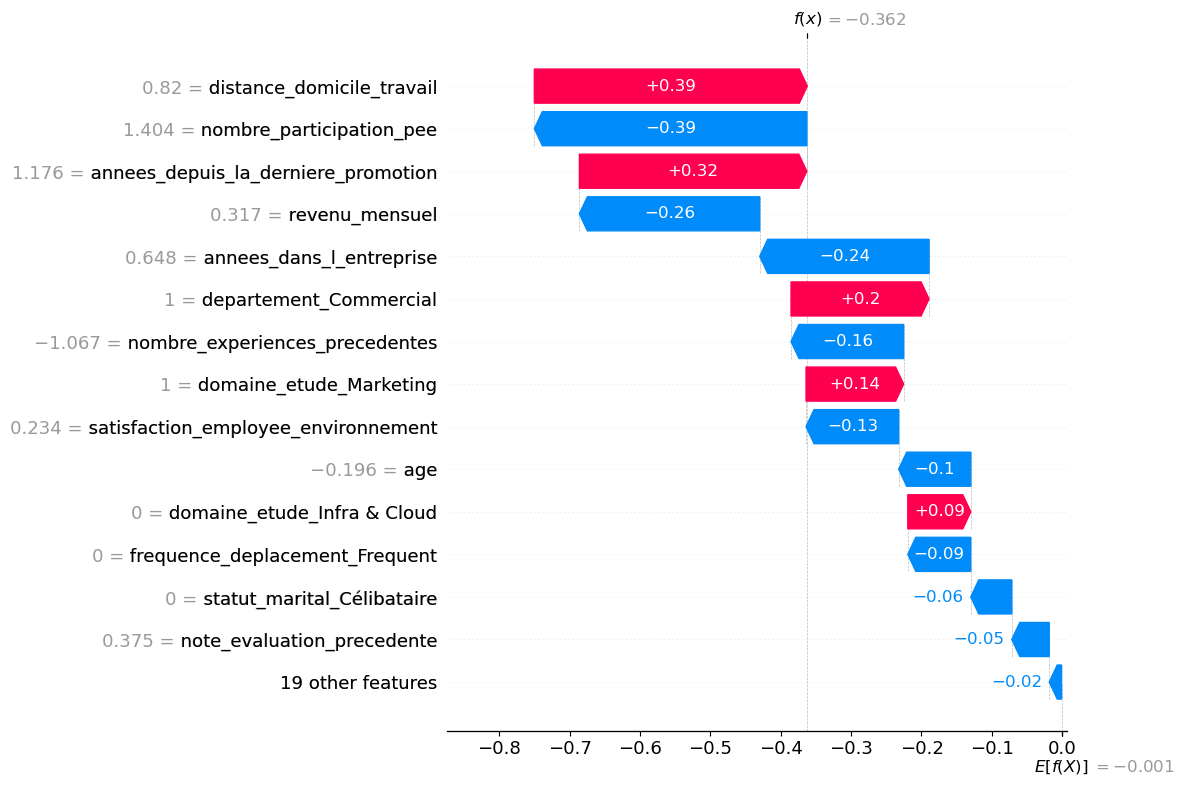

📊 SHAP Waterfall - Exemple Test


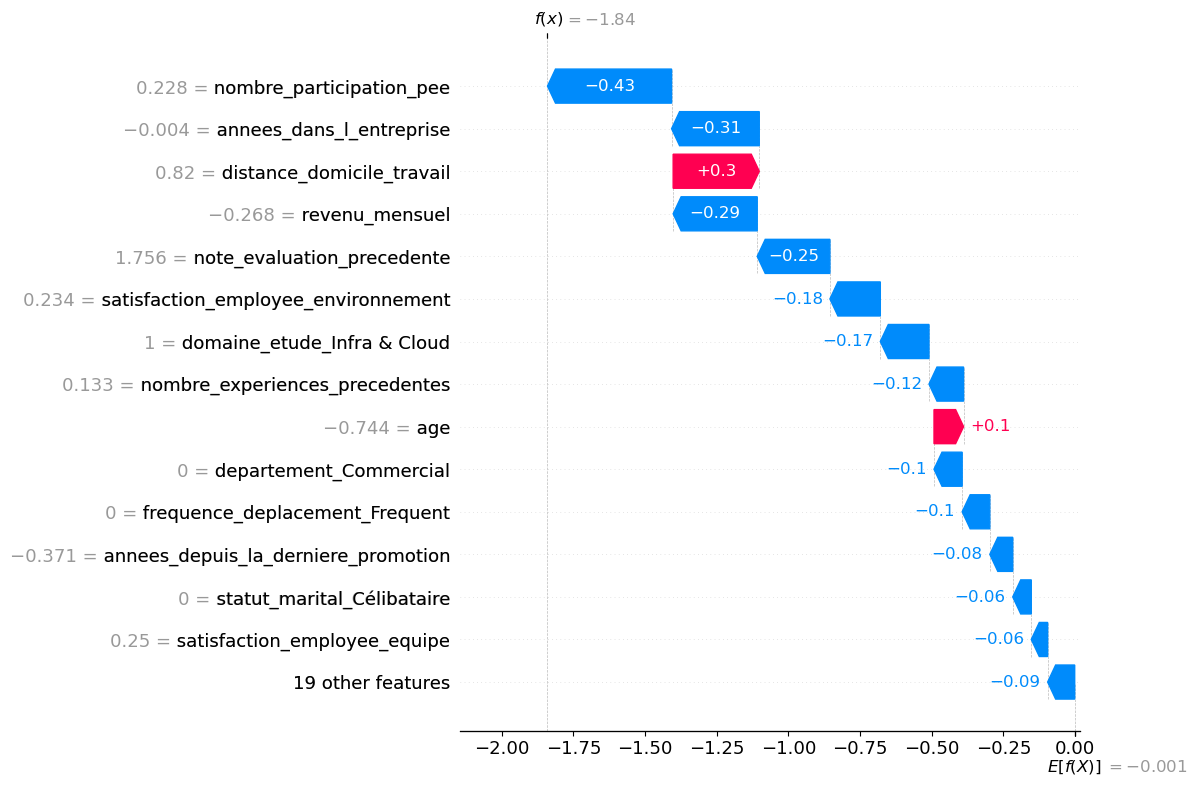

In [214]:
# ✅ Étape 1 : Transformer X_train et X_test avec le pipeline
preprocessor = best_model.named_steps["preprocessing"]
model = best_model.named_steps["xgb"]

# Obtenir les noms de features après transformation
ohe = preprocessor.named_transformers_["cat"]
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][2]
ohe_feature_names = ohe.get_feature_names_out(cat_features)
all_feature_names = list(num_features) + list(ohe_feature_names)

# Transformation
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# DataFrames nommés
X_train_df = pd.DataFrame(X_train_encoded, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test_encoded, columns=all_feature_names)

# ✅ Étape 2 : Créer l'explainer SHAP
explainer = shap.Explainer(model)

# ✅ Étape 3 : Calculer les valeurs SHAP
shap_values_train = explainer(X_train_df)
shap_values_test = explainer(X_test_df)

# ✅ Étape 4 : Waterfall plot pour un exemple du train
print("📊 SHAP Waterfall - Exemple Train")
shap.plots.waterfall(shap_values_train[0], max_display=15)

# ✅ Étape 5 : Waterfall plot pour un exemple du test
print("📊 SHAP Waterfall - Exemple Test")
shap.plots.waterfall(shap_values_test[0], max_display=15)


In [216]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [217]:
import joblib
joblib.dump(best_model, "model.pkl")

['model.pkl']

In [14]:
from fastapi import FastAPI
import joblib
import pandas as pd
from pydantic import BaseModel
from typing import List

app = FastAPI(title="ML Model API")

model = joblib.load("app/model/model.pkl")


class PredictionInput(BaseModel):
    features: List[float]


@app.get("/")
def home():
    return {"message": "API is running"}


@app.post("/predict")
def predict(data: PredictionInput):
    features = pd.DataFrame([data.features])

    prediction = model.predict(features)

    if prediction is None:
        return {"error": "Model returned None"}

    return {"prediction": list(prediction)}

## Random Forest + RandomizedSearchCV

Fitting 3 folds for each of 30 candidates, totalling 90 fits
📌 Meilleur seuil F1 valide : 0.29 — F1-score : 0.4299
✅ Accuracy: 0.7925170068027211
🎯 F1-score : 0.42990654205607476
🎯 Précision : 0.38333333333333336
🎯 Rappel : 0.48936170212765956
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       247
           1       0.38      0.49      0.43        47

    accuracy                           0.79       294
   macro avg       0.64      0.67      0.65       294
weighted avg       0.82      0.79      0.80       294

🧩 Matrice de confusion:
 [[210  37]
 [ 24  23]]
🏅 Meilleurs paramètres : {'classifier__n_estimators': 300, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': None, 'classifier__max_depth': 20}


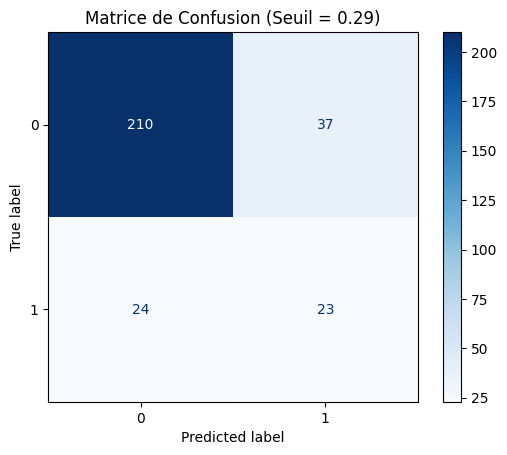

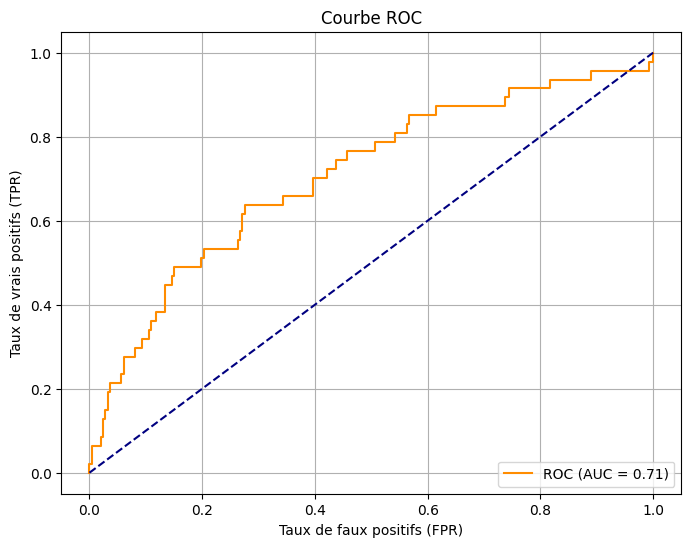

In [1800]:
# Le pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=45))
])

# Hyperparamètres à tester
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2', None]
}

# RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=30,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=45,
    n_jobs=-1
)

# Entraînement
search.fit(X_train, y_train)
best_model = search.best_estimator_

# Prédictions probabilistes
y_proba = best_model.predict_proba(X_test)[:, 1]

# 8. Trouver le meilleur seuil F1
thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores = []
valid_thresholds = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    if len(np.unique(y_pred_thresh)) < 2:
        continue  # Évite les cas avec une seule classe prédite
    score = f1_score(y_test, y_pred_thresh, zero_division=0)
    f1_scores.append(score)
    valid_thresholds.append(t)

# Meilleur seuil
best_f1_idx = np.argmax(f1_scores)
best_f1_thresh = valid_thresholds[best_f1_idx]
print(f"📌 Meilleur seuil F1 valide : {best_f1_thresh:.2f} — F1-score : {f1_scores[best_f1_idx]:.4f}")

# 9. Prédictions avec ce seuil
y_pred_opt = (y_proba >= best_f1_thresh).astype(int)

# 10. Évaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred_opt))
print("🎯 F1-score :", f1_score(y_test, y_pred_opt, zero_division=0))
print("🎯 Précision :", precision_score(y_test, y_pred_opt, zero_division=0))
print("🎯 Rappel :", recall_score(y_test, y_pred_opt, zero_division=0))
print("📊 Classification Report:\n", classification_report(y_test, y_pred_opt, zero_division=0))
print("🧩 Matrice de confusion:\n", confusion_matrix(y_test, y_pred_opt))
print("🏅 Meilleurs paramètres :", search.best_params_)

# 11. Matrice de confusion
cm = confusion_matrix(y_test, y_pred_opt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Matrice de Confusion (Seuil = {best_f1_thresh:.2f})")
plt.show()

# 12. Courbe ROC
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


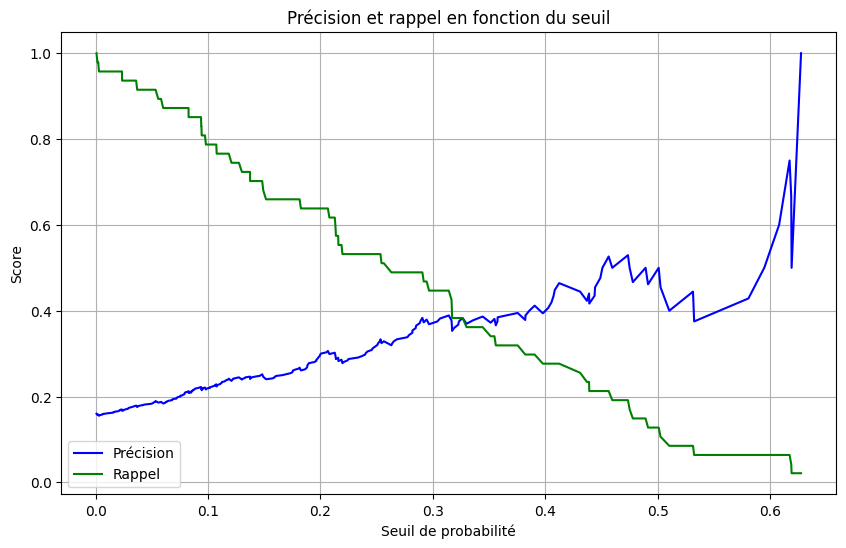

In [1801]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Précision', color='blue')
plt.plot(thresholds, recalls[:-1], label='Rappel', color='green')
plt.xlabel('Seuil de probabilité')
plt.ylabel('Score')
plt.title('Précision et rappel en fonction du seuil')
plt.legend()
plt.grid(True)
plt.show()

### Feature Importance Globale

In [1805]:
categorical_cols = ['genre', 'statut_marital', 'departement', 'domaine_etude', 'frequence_deplacement']
numerical_cols = list(set(features) - set(categorical_cols))

# Prétraitement
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

# Entraînement
model.fit(X, y)

# Extraction du classifieur et des features
rf_model = model.named_steps['classifier']
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(cat_feature_names)

# Importance des variables
importances = rf_model.feature_importances_
importances_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Affichage
importances_df.head(10)

,feature,importance
31,frequence_deplacement_Frequent,0.064473
9,nombre_participation_pee,0.057309
32,frequence_deplacement_Occasionnel,0.052850
21,departement_Commercial,0.052745
18,statut_marital_Célibataire,0.048308
3,annees_dans_l_entreprise,0.042313
27,domaine_etude_Marketing,0.040664
30,frequence_deplacement_Aucun,0.038075
11,satisfaction_employee_nature_travail,0.037898
15,satisfaction_employee_environnement,0.037201


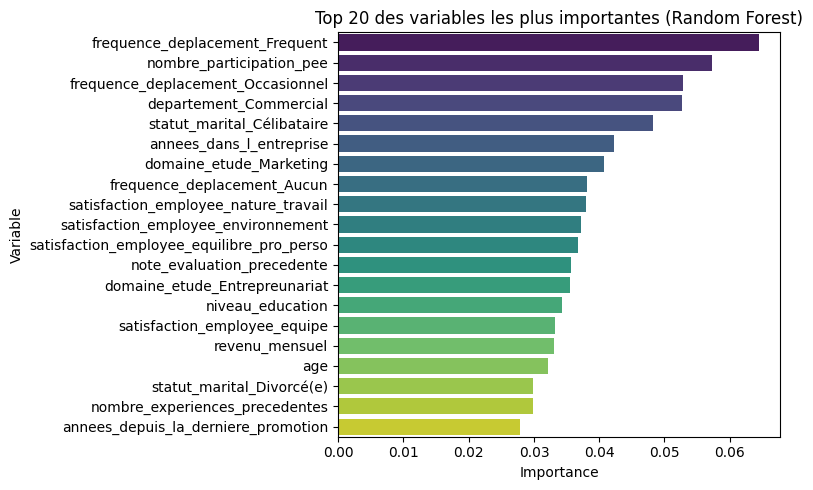

In [1807]:
top_features = importances_df.head(5)['feature'].tolist()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=importances_df.head(20),
    x='importance',
    y='feature',
    hue='feature',
    palette='viridis',
    dodge=False,
    legend=False  # facultatif : enlève la légende si elle est redondante
)

plt.title("Top 20 des variables les plus importantes (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

In [1809]:
df_analysis = X_test.copy()
df_analysis['proba'] = y_proba
df_analysis['pred'] = y_pred
df_analysis['target'] = y_test

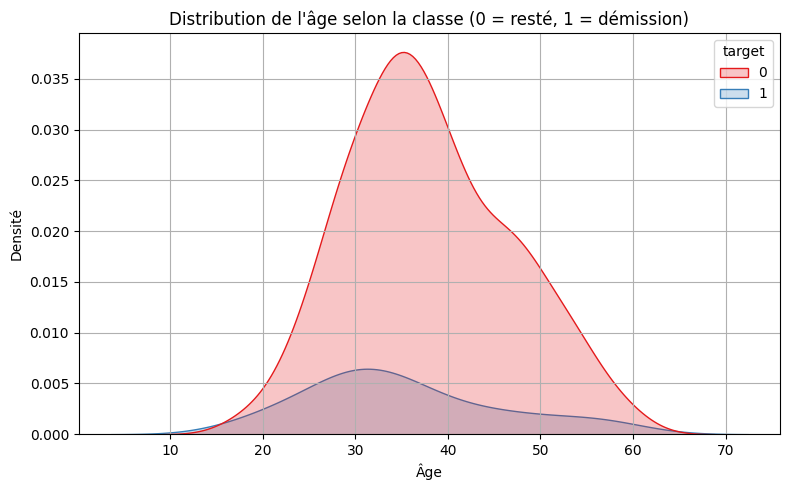

In [1811]:
# Exemple : comparer les distributions de l'âge
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_analysis, x='age', hue='target', fill=True, palette='Set1')
plt.title("Distribution de l'âge selon la classe (0 = resté, 1 = démission)")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.grid(True)
plt.tight_layout()
plt.show()


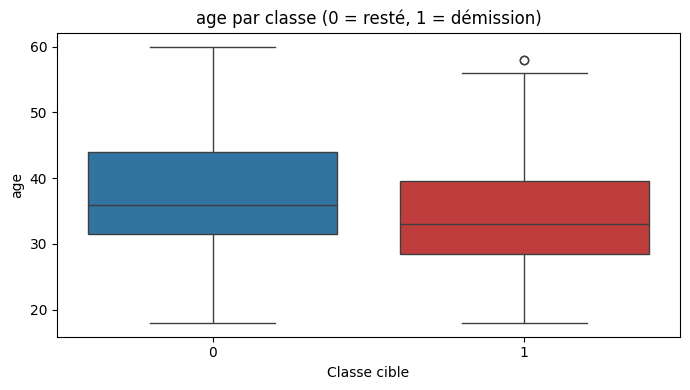

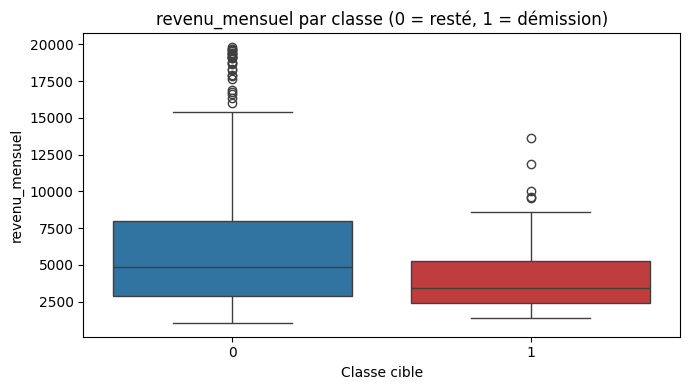

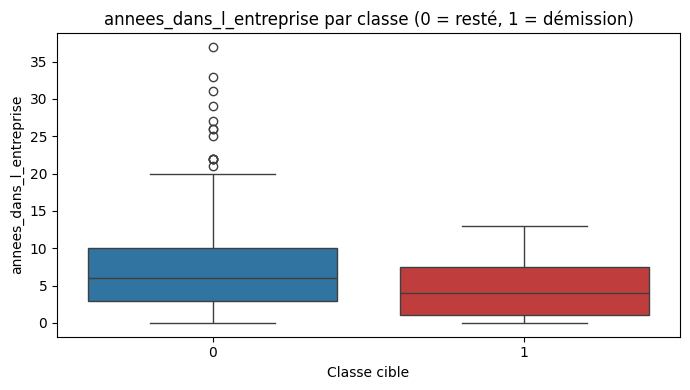

In [1813]:
for var in ['age', 'revenu_mensuel', 'annees_dans_l_entreprise']:
    plt.figure(figsize=(7, 4))
    custom_palette = {0: '#1f77b4', 1: '#d62728'}  # 0 = bleu, 1 = rouge
    sns.boxplot(data=df_analysis, x='target', y=var, hue='target', palette=custom_palette, dodge=False)
    plt.title(f"{var} par classe (0 = resté, 1 = démission)")
    plt.xlabel("Classe cible")
    plt.ylabel(var)
    plt.legend([], [], frameon=False)  # cacher la légende si elle fait doublon
    plt.tight_layout()
    plt.show()

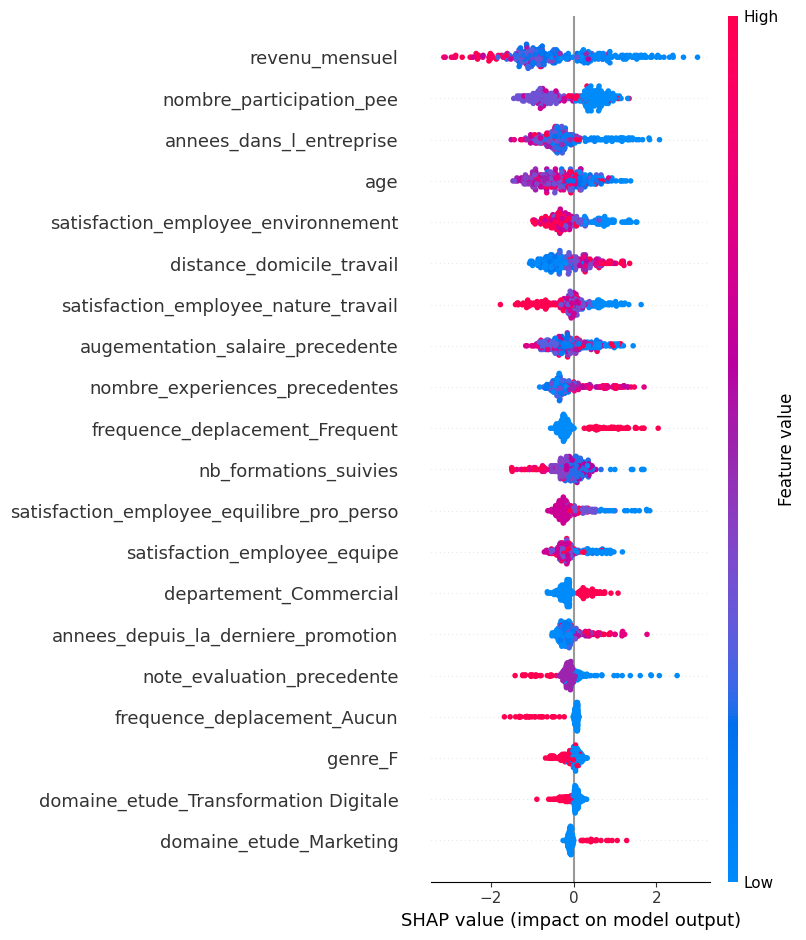

In [1815]:

X_transformed = model.named_steps['preprocessor'].transform(X_test)

# 2. Extraire le classifieur depuis le pipeline
clf = model.named_steps['classifier']

# 3. Créer l’explainer pour le classifieur
explainer = shap.TreeExplainer(clf)

# 4. Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_transformed)

# 5. Affichage global (importance moyenne)
shap.summary_plot(shap_values, X_transformed, feature_names=all_features)

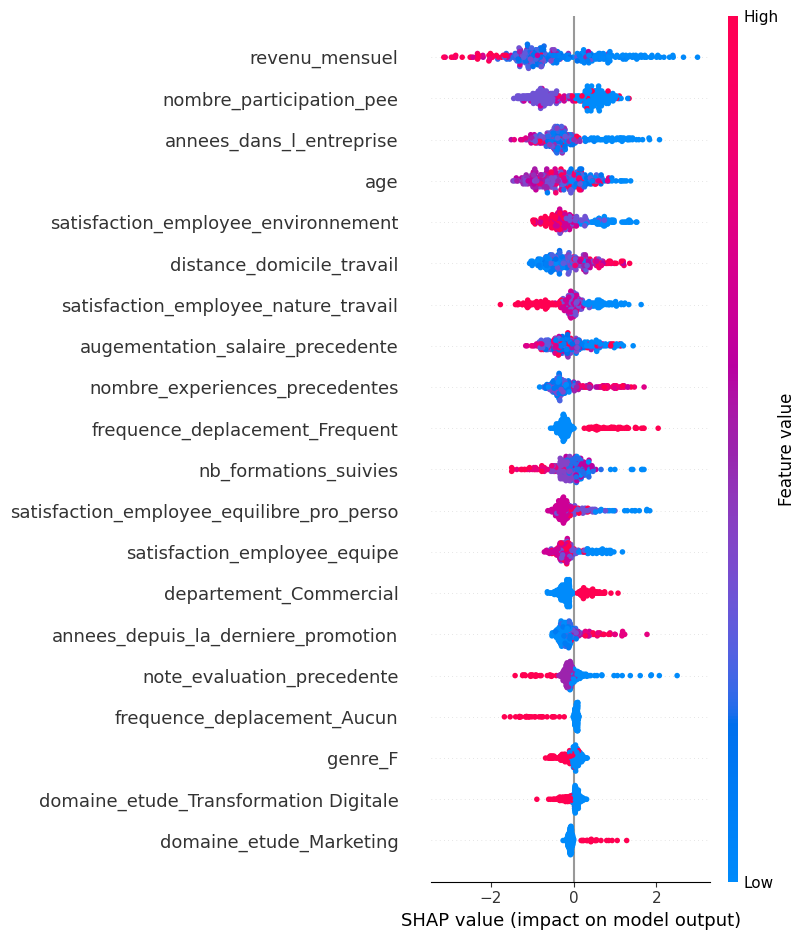

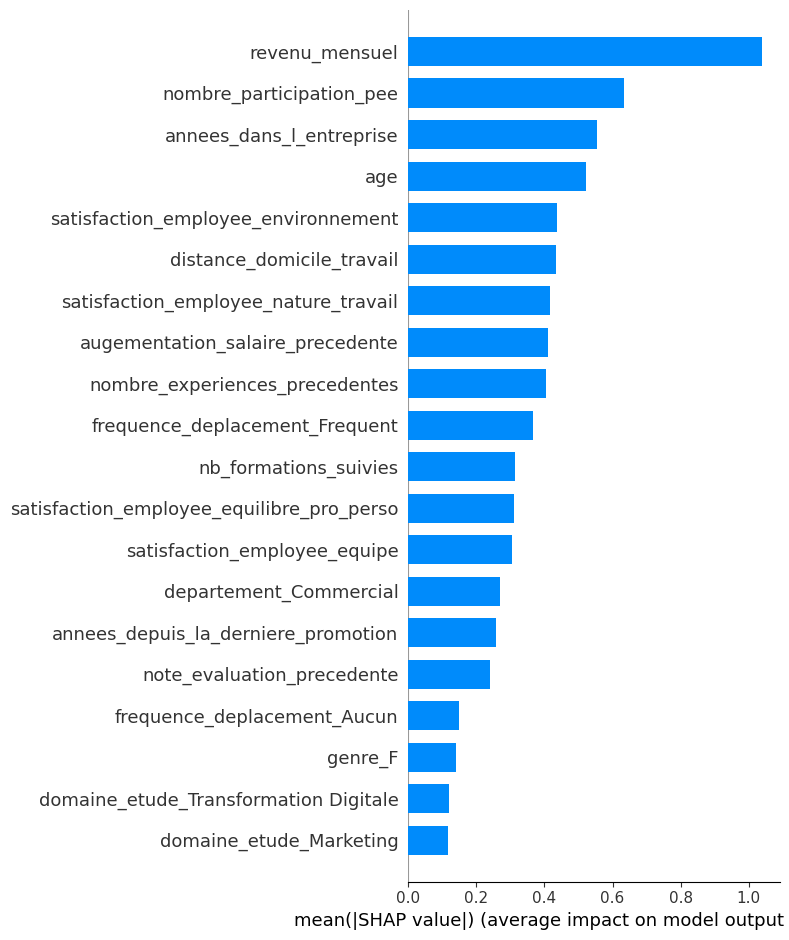

SHAP values shape : (294, 33)
X_transformed shape: (294, 33)
Nombre de features : 33


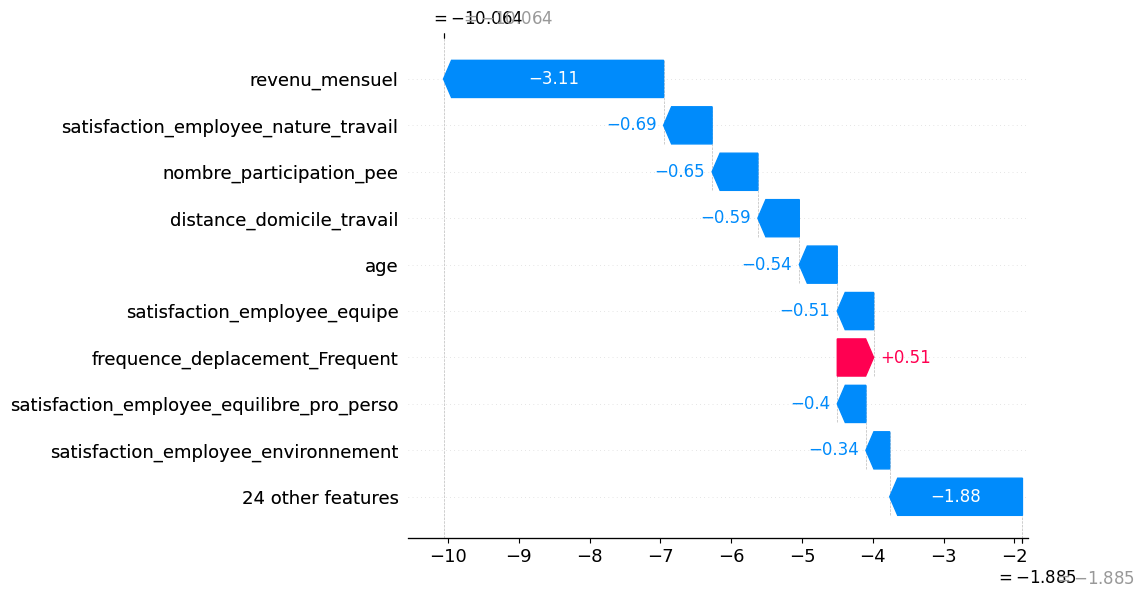

In [1817]:
# 1. Transformation des données
X_transformed = model.named_steps['preprocessor'].transform(X_test)

# 2. Explainer SHAP
explainer = shap.TreeExplainer(model.named_steps['classifier'])

# 3. Calcul des valeurs SHAP
shap_values = explainer.shap_values(X_transformed)

# 4. Affichage global
shap.summary_plot(shap_values, X_transformed, feature_names=all_features)          # Global (dot)
shap.summary_plot(shap_values, X_transformed, feature_names=all_features, plot_type="bar")  # Barplot

# 5. Diagnostic
print("SHAP values shape :", np.array(shap_values).shape)
print("X_transformed shape:", X_transformed.shape)
print("Nombre de features :", len(all_features))

# 6. Explication individuelle
index = 29

shap.plots._waterfall.waterfall_legacy(
    explainer.expected_value,        # ✅ plus de [1]
    shap_values[index],              # ✅ plus de [1][index]
    feature_names=all_features
)

## Feature Importance Individuel

✅ Prédiction du modèle pour l'individu 8 : 0.0046
🎯 Détail des variables d'entrée (X_test) :


,1406
age,54
genre,F
revenu_mensuel,4440
statut_marital,Célibataire
departement,Consulting
nombre_experiences_precedentes,6
annees_dans_l_entreprise,5
nombre_participation_pee,0
nb_formations_suivies,3
distance_domicile_travail,10


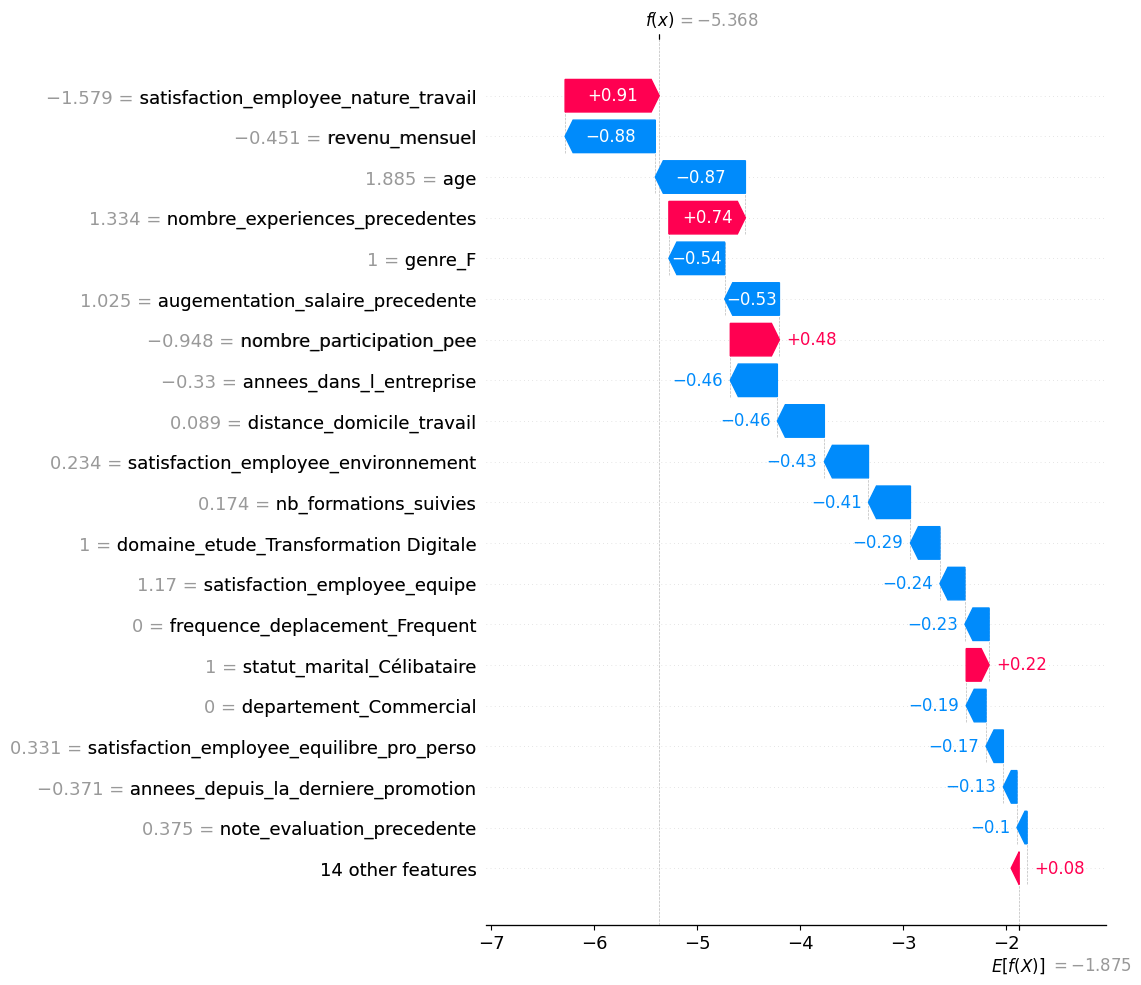

In [1838]:
# Entraîne ton pipeline (tu peux adapter ici)
model.fit(X_train, y_train)# 3. Appliquer le préprocessing à X_test
X_transformed = model.named_steps['preprocessor'].transform(X_test)

# 4. Récupérer tous les noms de features transformées
# Numériques (inchangés)
num_features = numerical_cols

# Catégoriques (encodées avec OneHotEncoder)
cat_encoder = model.named_steps['preprocessor'].named_transformers_['cat']
cat_features = cat_encoder.get_feature_names_out(categorical_cols)

# Tous les noms de features finales
all_features = num_features + list(cat_features)

# Si la transformation renvoie un array sparse, convertir
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# Mettre sous forme DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)

# 5. SHAP Explainer (ex: TreeExplainer pour XGBoost / RF)
explainer = shap.Explainer(model.named_steps['classifier'])
shap_values = explainer(X_transformed_df)

# 6. Explication individuelle
index = 8  # 👈 Choisis un individu (ligne dans X_test)

print(f"✅ Prédiction du modèle pour l'individu {index} : {model.predict_proba(X_test.iloc[[index]])[:,1][0]:.4f}")
print("🎯 Détail des variables d'entrée (X_test) :")
display(X_test.iloc[[index]].T)

# Waterfall Plot
shap.plots.waterfall(shap_values[index], max_display=20)

### Tableau comparatif des performances modèles

In [1852]:
# 📌 Création du dictionnaire de résultats
data = {
    "Modèle": [
        "Dummy (Stratified)", 
        "Régression Logistique + RandomizedSearchCV", 
        "XGBoost + RandomizedSearchCV", 
        "Random Forest + RandomizedSearchCV"
    ],
    
    "Accuracy": [
        0.7109,
        0.7448,
        0.7483,
        0.7925
    ],
    
    "F1-score": [
        0.1584,
        0.3902,
        0.4308,
        0.4299
    ],
    
    "Précision": [
        0.1481,
        0.3157,
        0.3373,
        0.3833
    ],
    
    "Rappel": [
        0.1702,
        0.5106,
        0.5957,
        0.4894
    ],
    
    # 🔢 Matrice de confusion (TN, FP, FN, TP) — Dummy rempli avec 0
    "TN": [201, 195, 192, 210],
    "FP": [46, 52, 55, 37],
    "FN": [39, 23, 19, 24],
    "TP": [8, 24, 28, 23],

  
}

# ✅ Créer le DataFrame
df_results = pd.DataFrame(data)

# ✅ Affichage
print("📊 Résumé des performances des modèles :")
display(df_results.round(4))


📊 Résumé des performances des modèles :


,Modèle,Accuracy,F1-score,Précision,Rappel,TN,FP,FN,TP
0,Dummy (Stratified),0.7109,0.1584,0.1481,0.1702,201,46,39,8
1,Régression Logistique + RandomizedSearchCV,0.7448,0.3902,0.3157,0.5106,195,52,23,24
2,XGBoost + RandomizedSearchCV,0.7483,0.4308,0.3373,0.5957,192,55,19,28
3,Random Forest + RandomizedSearchCV,0.7925,0.4299,0.3833,0.4894,210,37,24,23


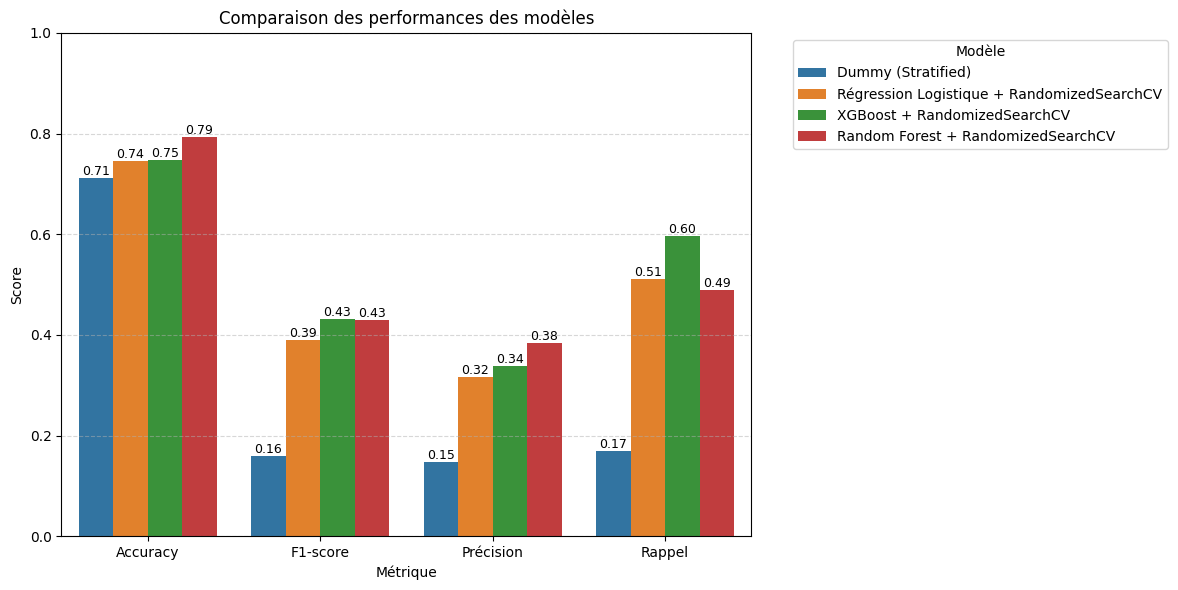

In [1854]:
# Sélection des colonnes à tracer
df_plot = df_results[["Modèle", "Accuracy", "F1-score", "Précision", "Rappel"]]

# Restructurer le DataFrame pour un barplot groupé
df_melted = df_plot.melt(id_vars="Modèle", var_name="Métrique", value_name="Score")

# Taille de la figure
plt.figure(figsize=(12, 6))

# Ajoute les scores sur les barres
sns.barplot(data=df_melted, x="Métrique", y="Score", hue="Modèle")

# Annoter les barres
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

# Options de style
plt.title("Comparaison des performances des modèles")
plt.ylim(0, 1)
plt.legend(title="Modèle", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

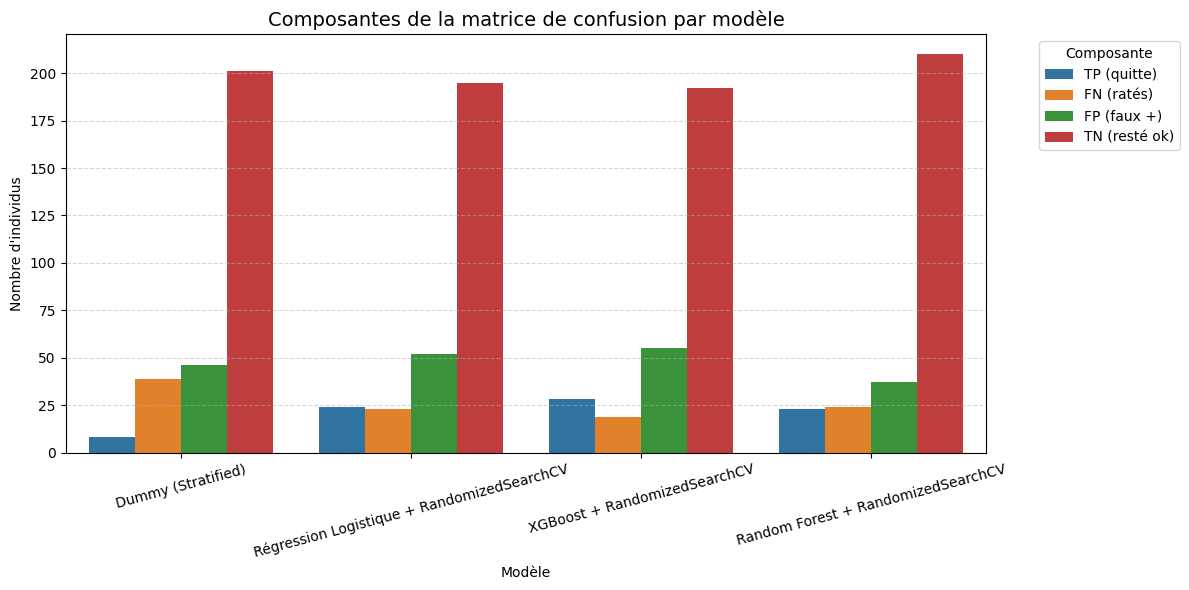

In [1856]:
df_results.rename(columns={
    "TP": "TP (quitte)",
    "FN": "FN (ratés)",
    "FP": "FP (faux +)",
    "TN": "TN (resté ok)"
}, inplace=True)

mat_conf_cols = ["TP (quitte)", "FN (ratés)", "FP (faux +)", "TN (resté ok)"]

# Restructuration pour le barplot
df_melt = df_results[["Modèle"] + mat_conf_cols].melt(
    id_vars="Modèle", 
    var_name="Type", 
    value_name="Valeur"
)

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x="Modèle", y="Valeur", hue="Type")

# Style
plt.title("Composantes de la matrice de confusion par modèle", fontsize=14)
plt.ylabel("Nombre d'individus")
plt.xlabel("Modèle")
plt.xticks(rotation=15)
plt.legend(title="Composante", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()